In [663]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix,precision_score

Data Ingestion: 11 marks

1.1 Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc. Null value check, Summary stats, Skewness must be discussed. (4 Marks)

In [664]:
el_dict=pd.read_excel('Election_Data.xlsx',sheet_name='Sheet1')

In [665]:
el_dict.dropna(inplace=True)

In [666]:
import dtale
dtale.show(el_dict)

In [667]:
el=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')

In [668]:
el.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [669]:
el.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [670]:
el=el.drop('Unnamed: 0',axis=1)

In [671]:
el.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [672]:
el.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [673]:
el.duplicated().sum()

8

In [674]:
### dropping duplicate records even if they belong to different people
el.drop_duplicates(inplace=True)

In [675]:
el.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


In [676]:
el.describe(include='object').T

,count,unique,top,freq
vote,1517,2,Labour,1057
gender,1517,2,female,808


In [677]:
el.shape
### 1525 rows and 9 columns

(1517, 9)

In [678]:
el.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [679]:
el.vote.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [680]:
el.gender.value_counts()

female    808
male      709
Name: gender, dtype: int64

In [681]:
### renaming columns with dot in them
### using the original dataset for that
el.rename({'economic.cond.household':'economic_cond_household','economic.cond.national':'economic_cond_national',
           'political.knowledge':'political_knowledge'},axis=1,inplace=True)

In [682]:
el.head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


Inferences:

1. No null values found.
2. Duplicates found but not removing them as no primary key has been provided, so we could most probably be dropping valid records.
3. No bad values found including spelling errors or letter case problems.
4. There are 9 columns and 1525 rows in the dataset. 
5. There are two 'object' and seven 'int64' datatype variables in the dataset.
6. There are two party choices, namely 'Labour' and 'Conservative', with majority dataset records belonging to 'Labour'.
7. In the gender category, two genders, namely 'female' and 'male' appear in the dataset, with majority records belonging to 'female'.
8. The age of the records varies from 24 to 93, inclusive. 
9. All the other columns are ordinal with numeric categories, as given in the dataset dictionary.
10. Skewness: All the numeric columns look well-balanced except 'age', which is slightly skewed to the right, 'Europe' which is skewed to the left, and 'political_knowledge' which displays a significant skew to the right.

1.2 Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct. (7 Marks)

In [683]:
el_num=el.select_dtypes('int64') ### will use this in the for loop for the boxplot of numeric columns
el_cat=el.select_dtypes('object') ### keeping it for later use, if need be

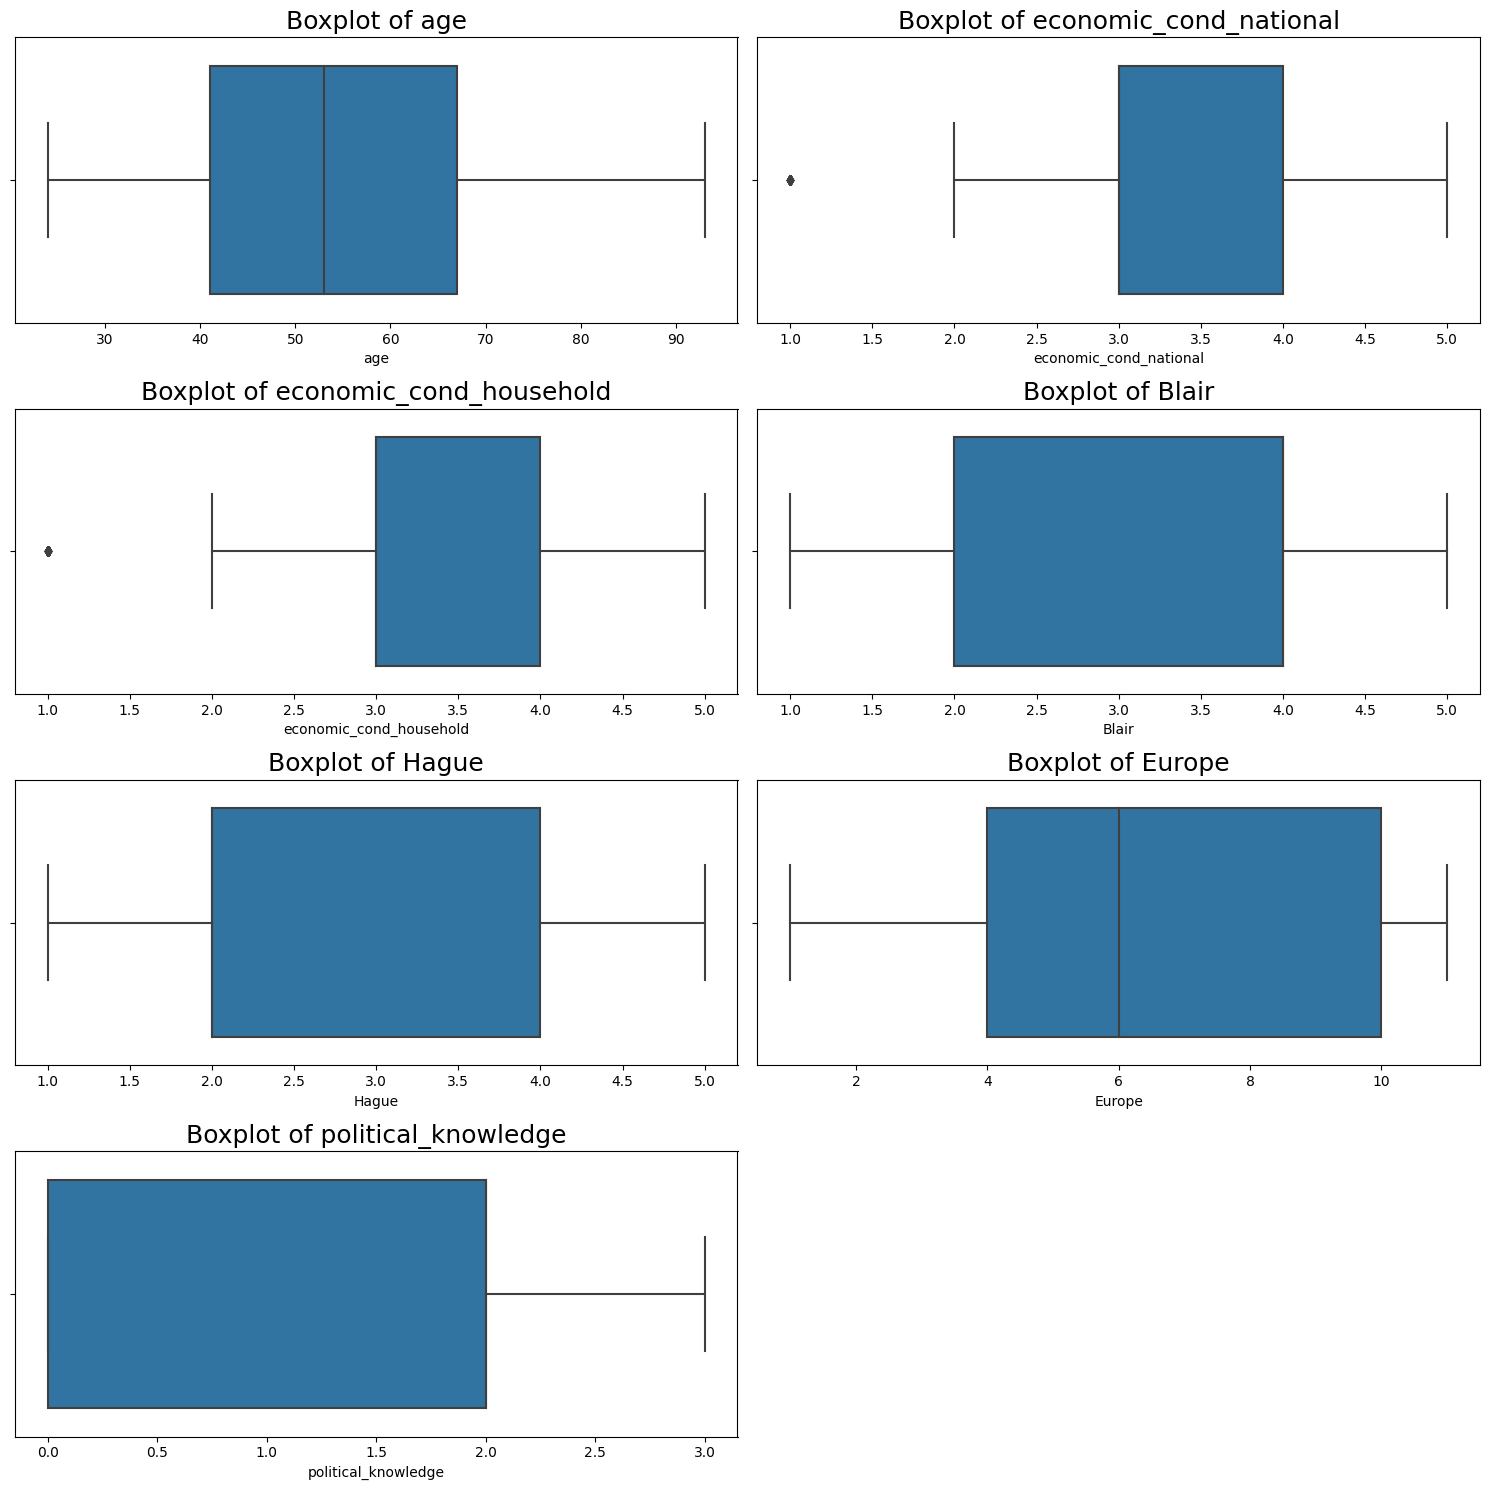

In [684]:
plt.figure(figsize=(15,15))
features=el_num.columns
for i in range(len(features)):
        plt.subplot(4,2,i+1)
        sns.boxplot(data=el,x=el_num.columns[i])
        plt.title(f"Boxplot of {el_num.columns[i]}",fontsize=18)
        plt.tight_layout();

In [685]:
el[el.economic_cond_household==1]

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
19,Labour,37,3,1,1,1,5,2,female
21,Labour,53,2,1,2,4,5,2,male
35,Labour,41,3,1,4,4,6,3,female
42,Labour,66,1,1,4,2,8,0,female
62,Labour,28,4,1,4,2,6,2,female
...,...,...,...,...,...,...,...,...,...
1469,Conservative,70,1,1,2,5,11,2,male
1480,Labour,55,2,1,4,4,7,2,female
1493,Labour,34,3,1,4,2,6,2,female
1501,Conservative,44,3,1,4,2,9,3,female


In [686]:
el[el.economic_cond_household==1].shape

(65, 9)

In [687]:
el[(el.economic_cond_household==1) & (el.economic_cond_national==1)]

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
42,Labour,66,1,1,4,2,8,0,female
91,Conservative,49,1,1,2,4,8,3,female
109,Labour,31,1,1,2,4,11,0,male
215,Conservative,34,1,1,1,4,11,3,male
385,Conservative,68,1,1,2,4,10,2,female
435,Labour,49,1,1,2,2,6,0,male
441,Labour,78,1,1,4,4,1,0,female
446,Conservative,66,1,1,2,4,9,2,male
449,Labour,48,1,1,4,4,11,2,male
493,Labour,53,1,1,1,4,7,2,female


In [688]:
el[(el.economic_cond_household==1) & (el.economic_cond_national==1)].shape

(15, 9)

In [689]:
el[el.economic_cond_national==1]

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
39,Conservative,72,1,3,2,2,11,2,female
42,Labour,66,1,1,4,2,8,0,female
57,Labour,32,1,2,1,4,1,2,male
91,Conservative,49,1,1,2,4,8,3,female
105,Labour,60,1,3,1,4,8,0,female
109,Labour,31,1,1,2,4,11,0,male
159,Labour,67,1,3,2,4,11,0,female
165,Conservative,53,1,3,1,4,6,2,male
215,Conservative,34,1,1,1,4,11,3,male
291,Conservative,60,1,2,2,5,11,2,female


In [690]:
el[el.economic_cond_national==1].shape

(37, 9)

In [691]:
### choosing to leave the outliers untreated as all the records look valid
### don't want to disturb or drop them

1. There are 9 columns and 1525 rows in the dataset. 
2. There are two 'object' and seven 'int64' datatype variables in the dataset.
3. Only two columns have outliers: 'economic_cond_household' and'economic_cond_national'. Both have outliers at the lower end.
4. There are 102 records in total containing the outliers from 'economic_cond_national'(37) and 'economic_cond_household'(65). 15 records are common for both.

Next: Checking the distribution for each variable.

Univariate Analysis:

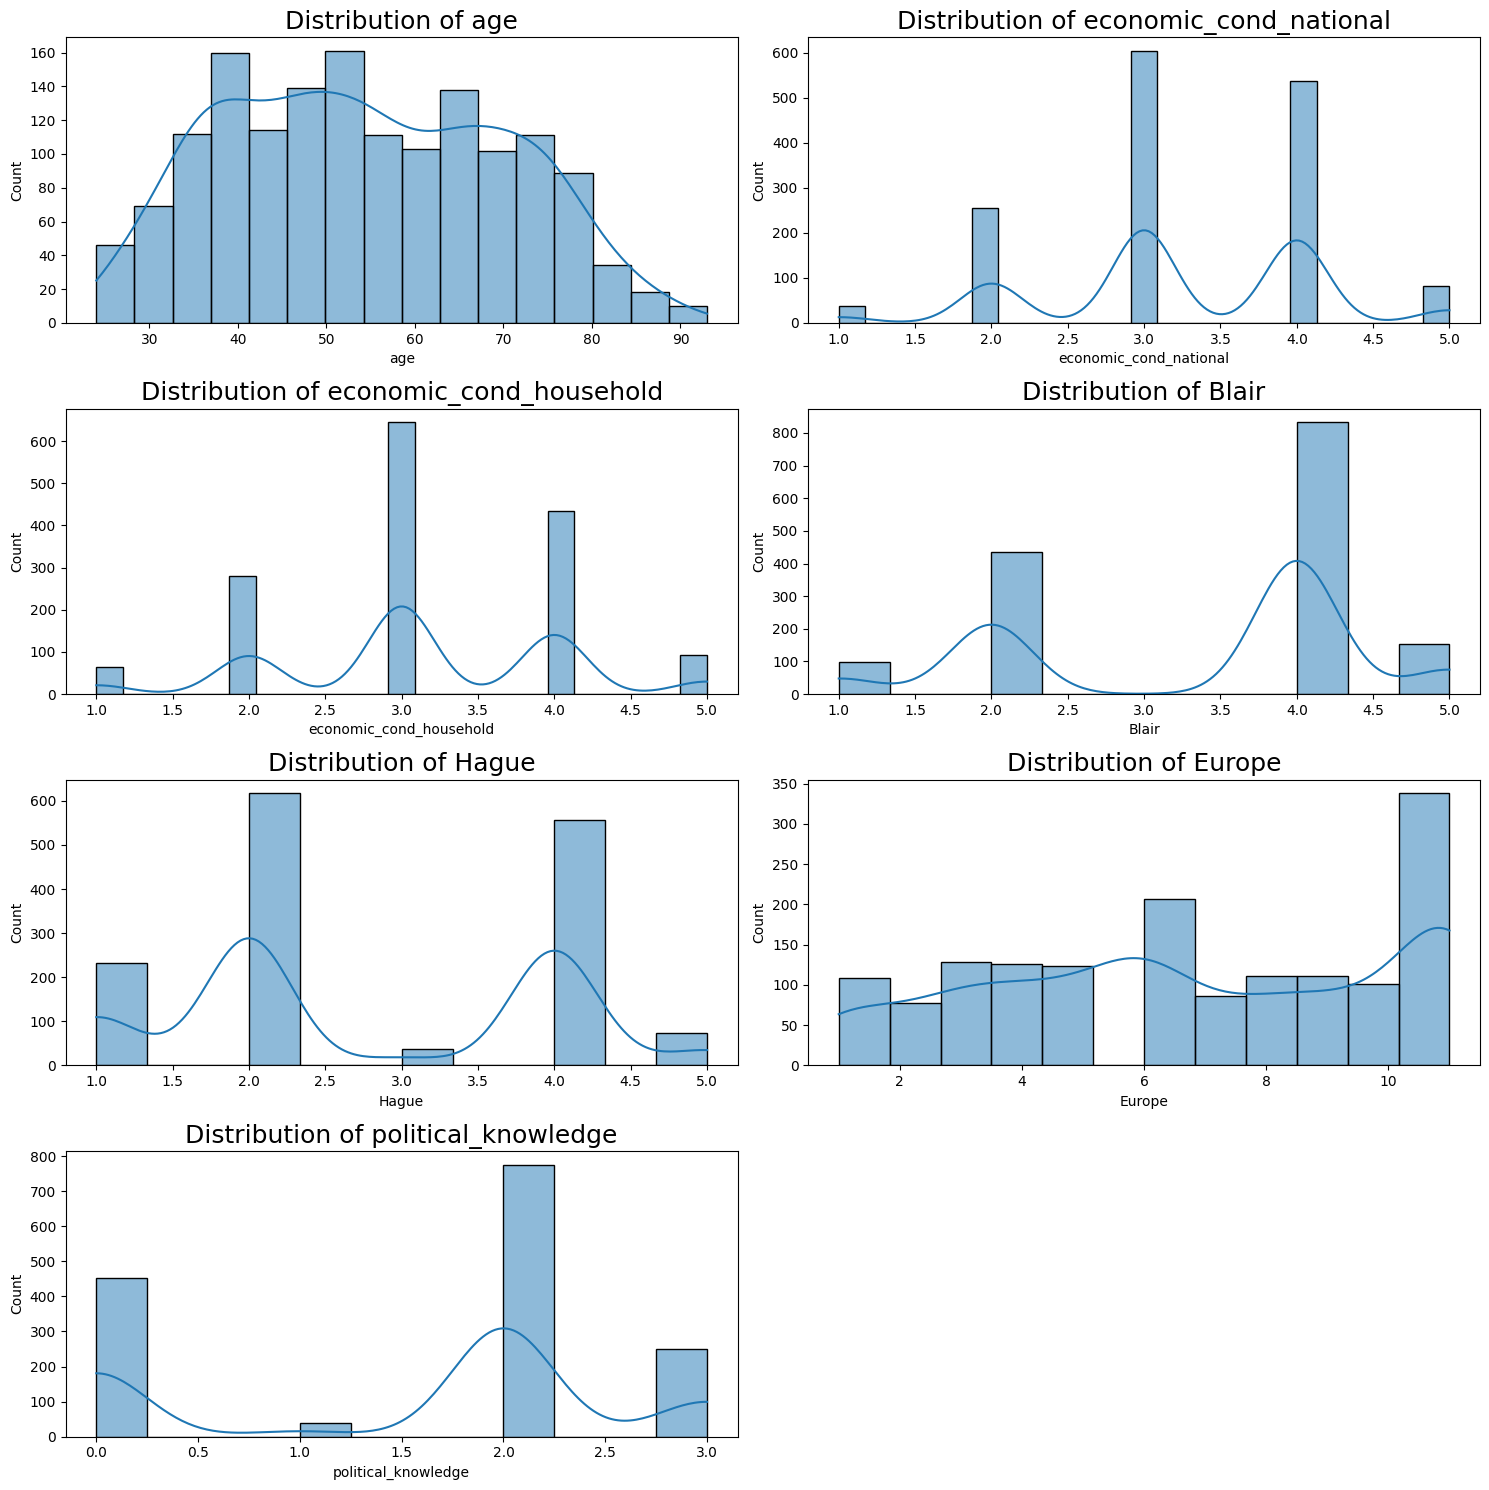

In [692]:
plt.figure(figsize=(15,15))
features=el_num.columns
for i in range(len(features)):
        plt.subplot(4,2,i+1)
        sns.histplot(data=el,x=el_num.columns[i],kde=True)
        plt.title(f"Distribution of {el_num.columns[i]}",fontsize=18)
        plt.tight_layout();

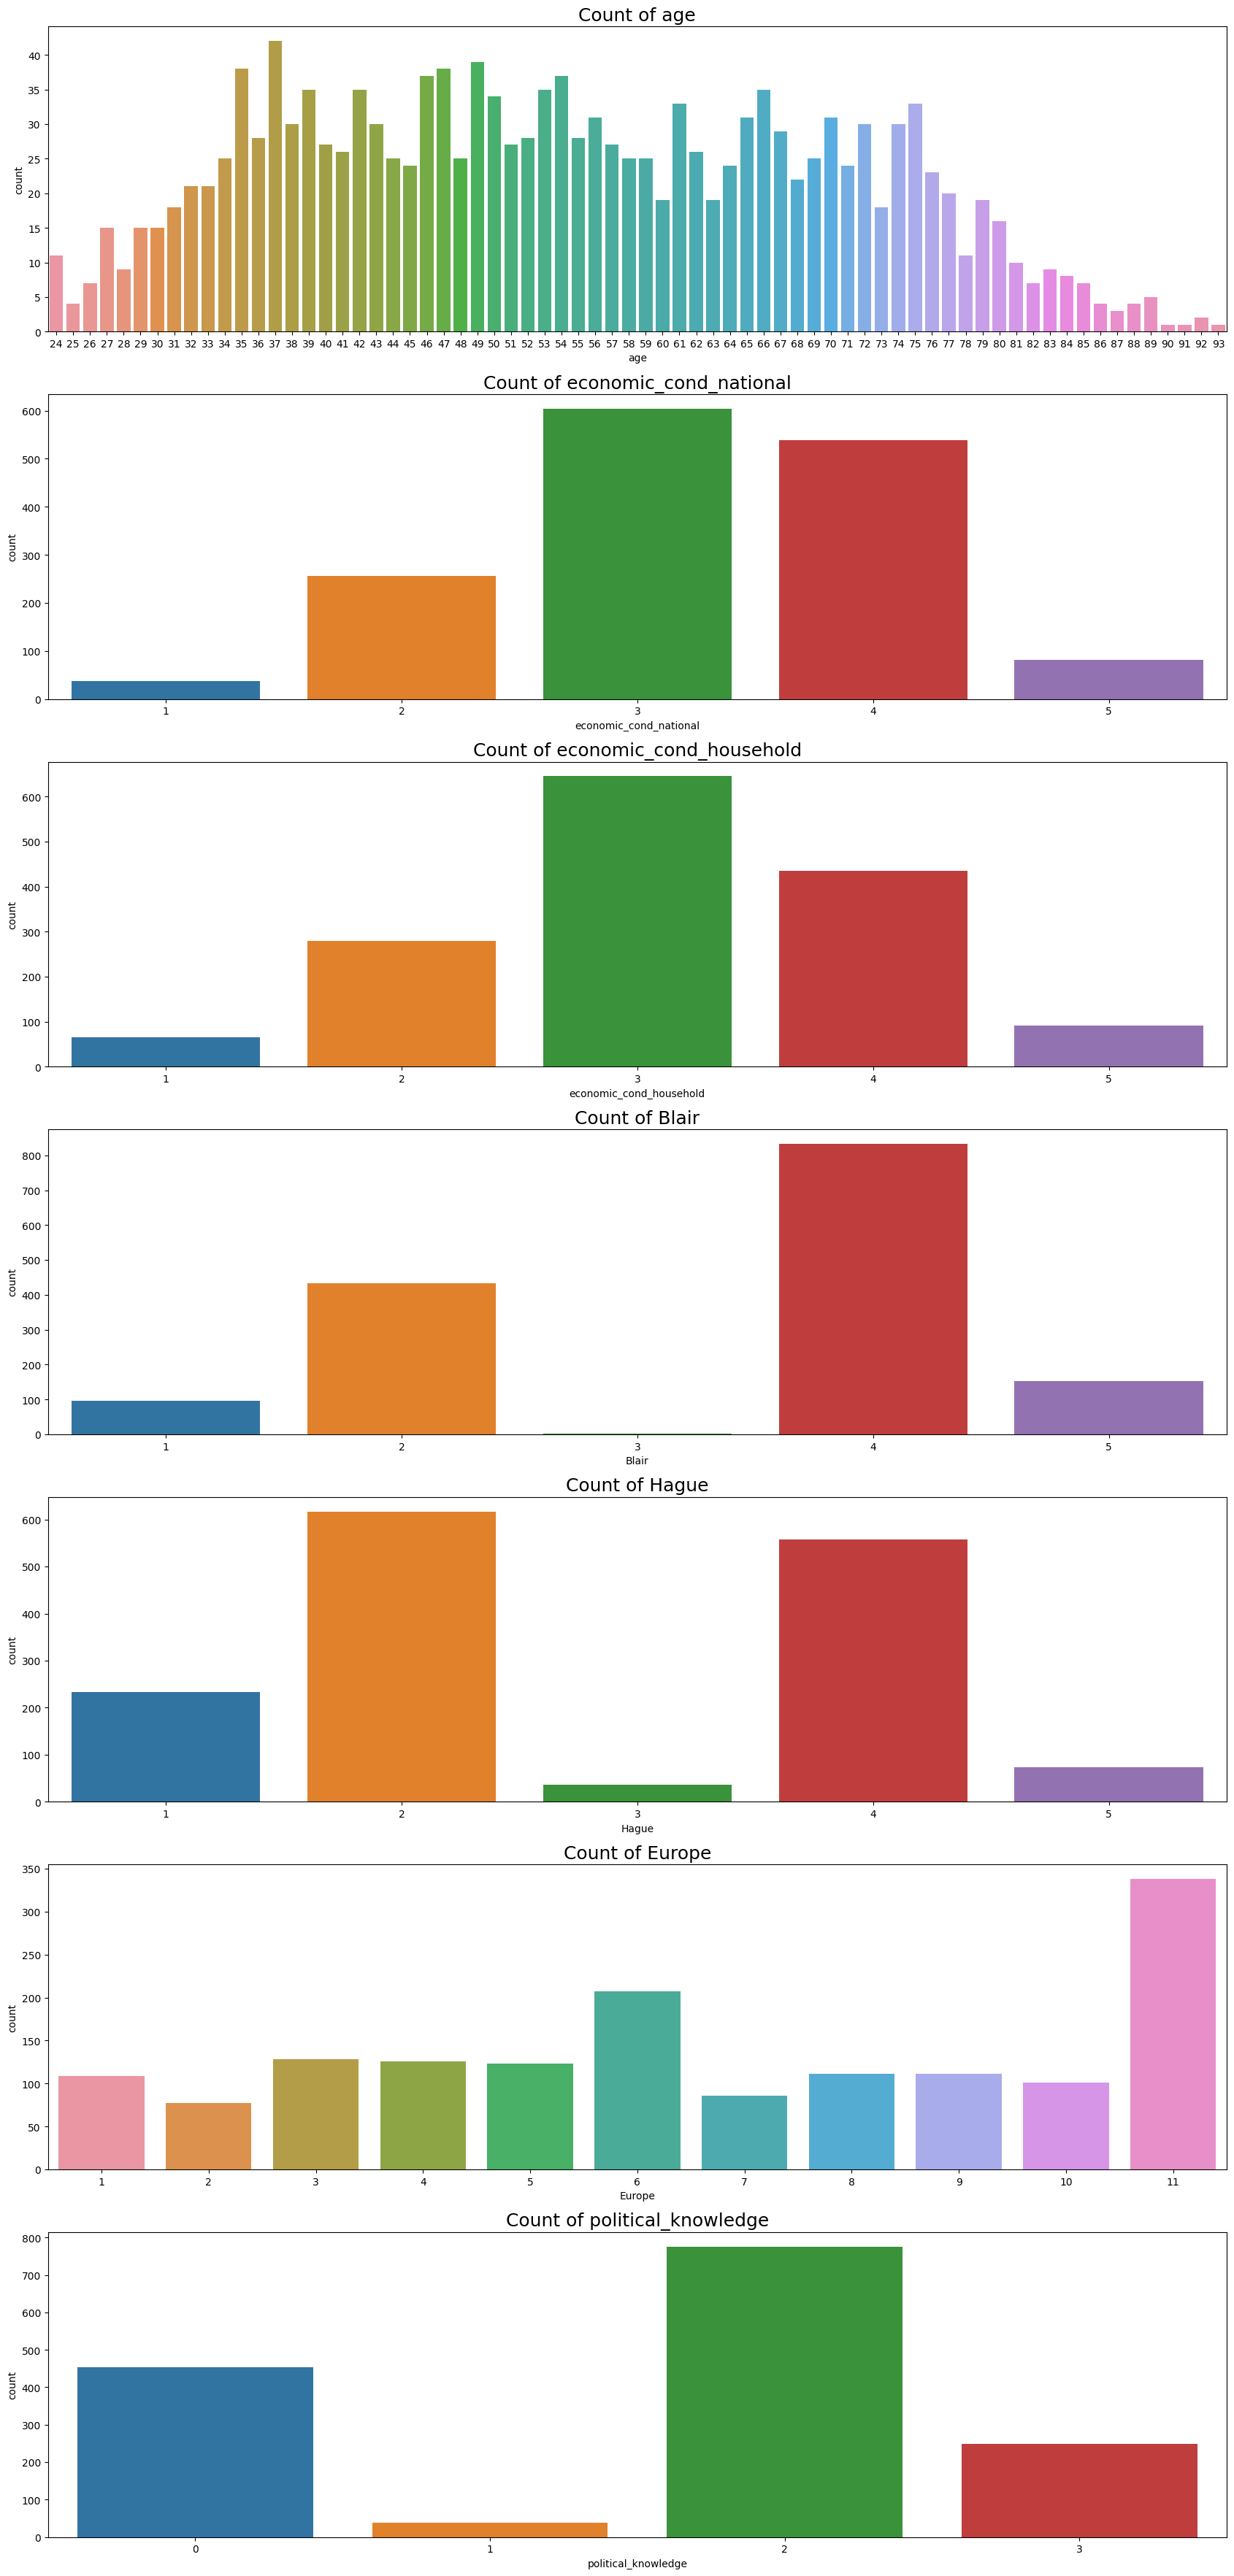

In [693]:
plt.figure(figsize=(17,40))
features=el_num.columns
for i in range(len(features)):
        plt.subplot(8,1,i+1)
        sns.countplot(data=el,x=el_num.columns[i])
        plt.title(f"Count of {el_num.columns[i]}",fontsize=18)
        plt.tight_layout();

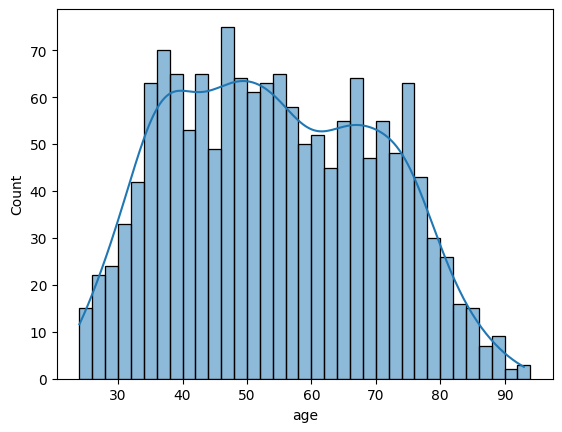

In [694]:
sns.histplot(data=el,x=el.age,binwidth=2,kde=True);
### assessing 'age' variable separately after adjust binwidth

5. Ages from 34 to 76 seem to be among the most active records.
6. Economic_cond_national and economic_cond_household have 3 as their most popular category
7. 4 in 'Blair', 2 in 'Hague' and 11 in 'Europe' are the most popular categories.
8. Under 'political_knowledge', 2 is the most popular level.

Bivariate Analysis:

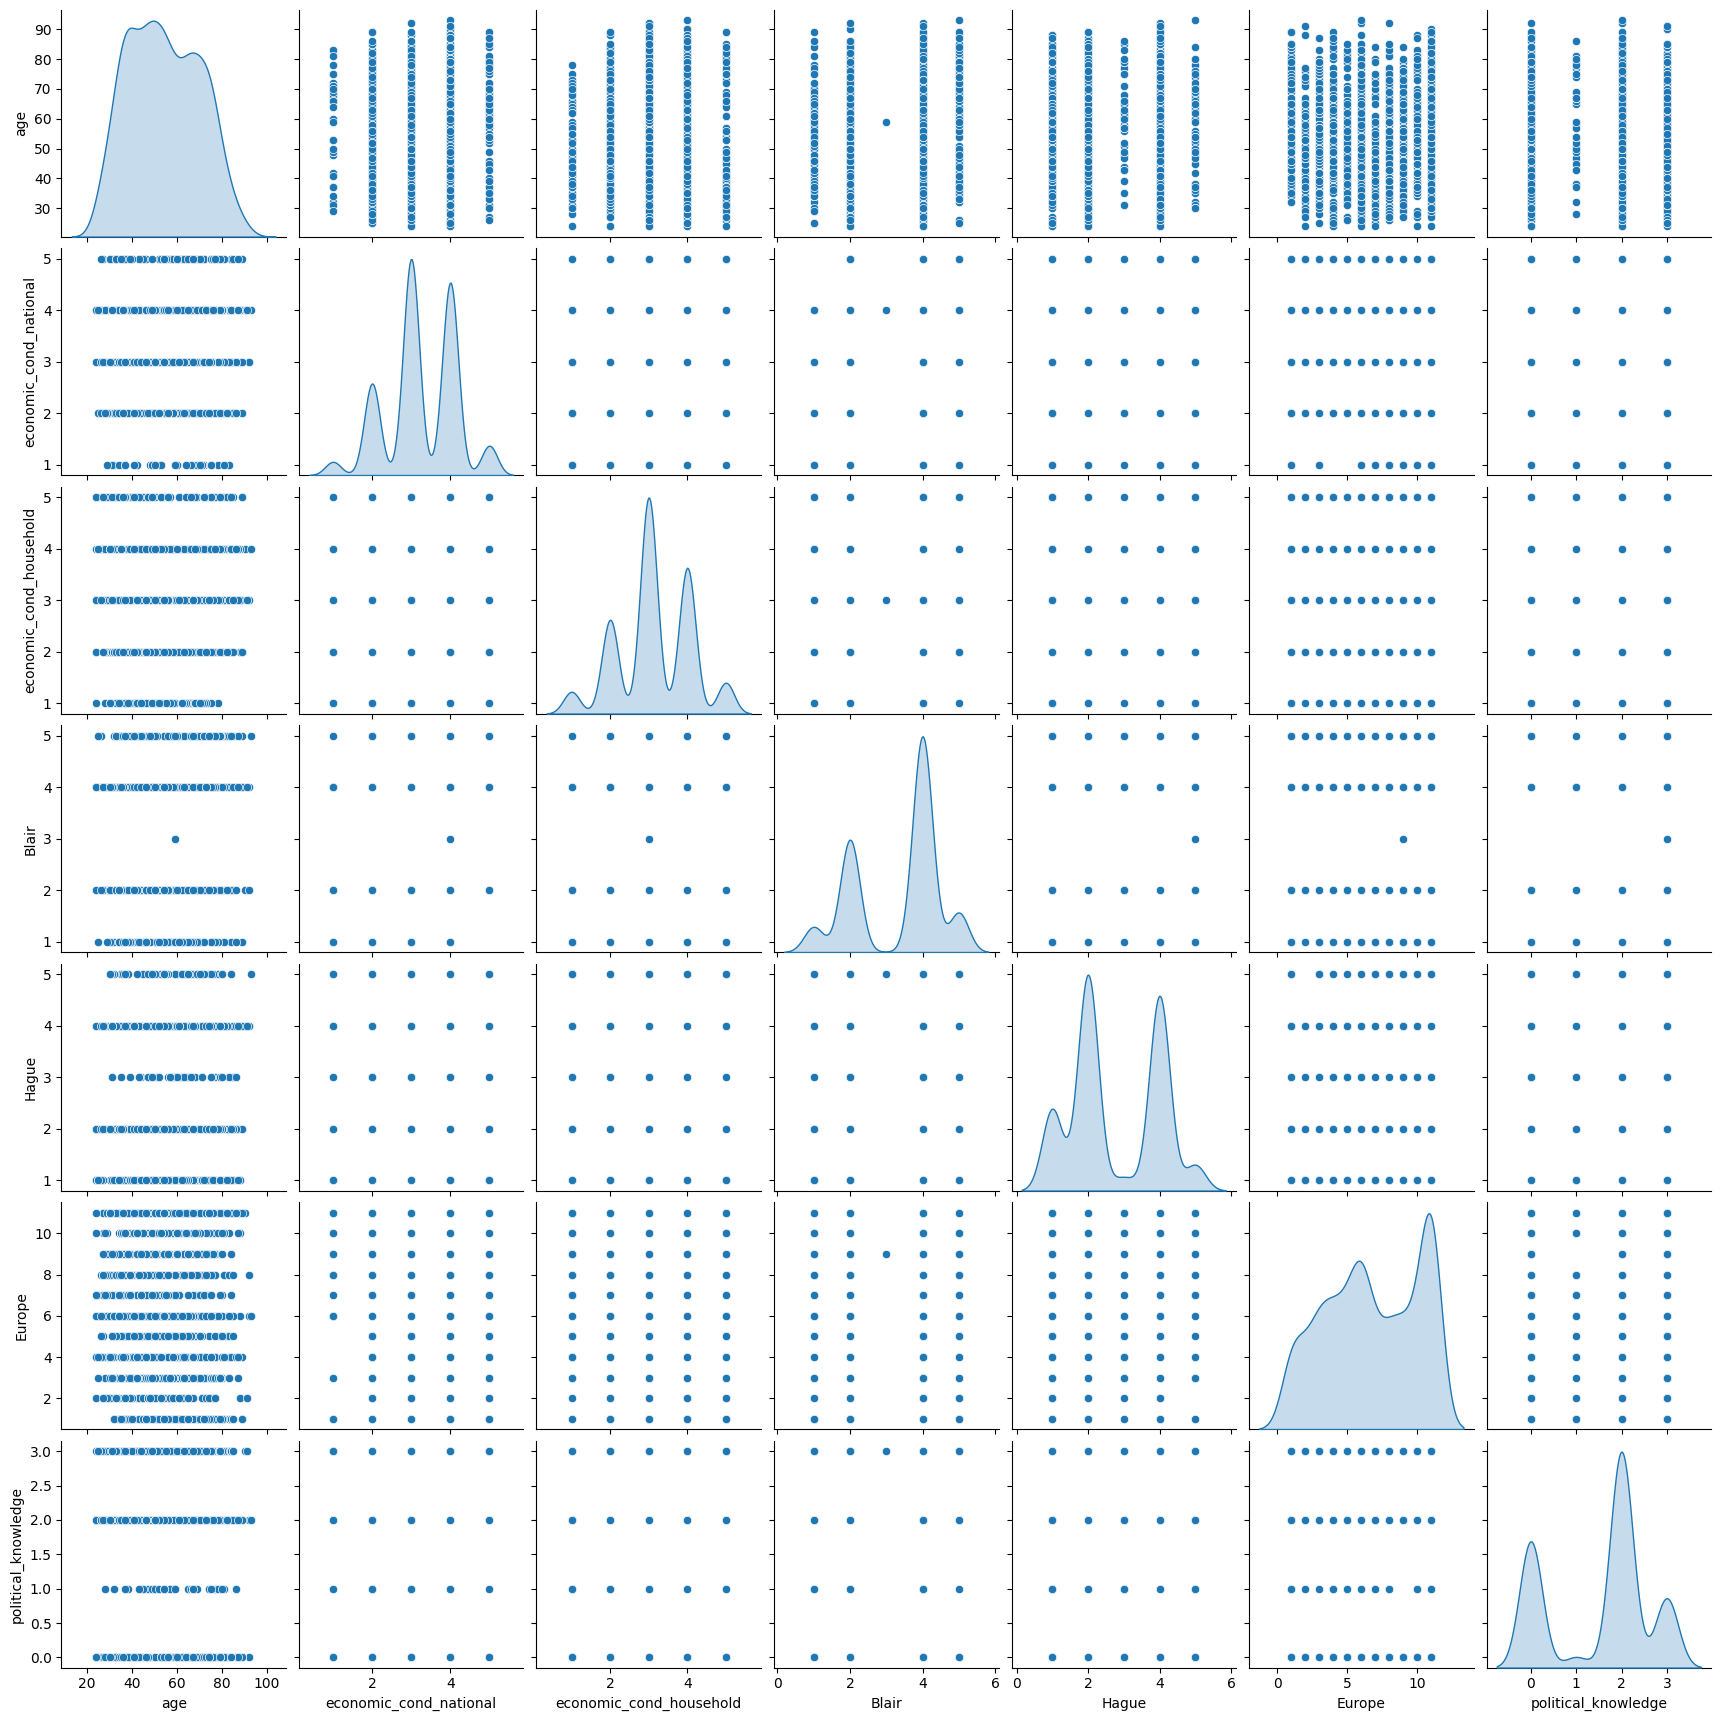

In [695]:
sns.pairplot(el_num,diag_kind='kde');

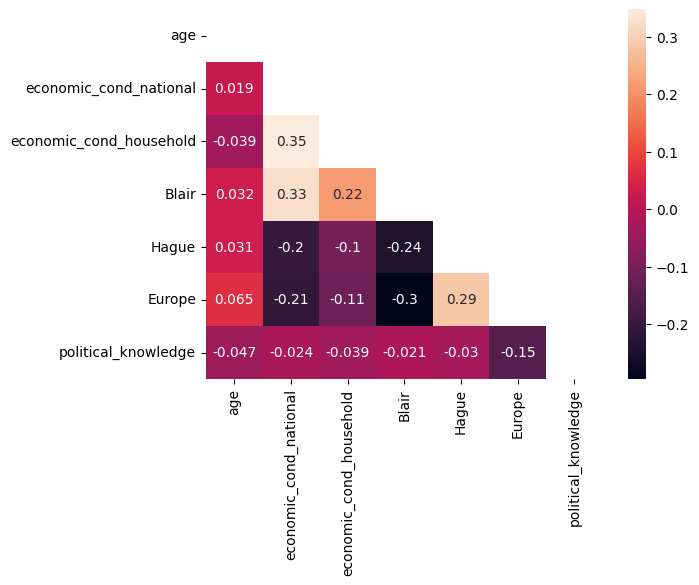

In [696]:
corr=el_num.corr()
sns.heatmap(corr,annot=True,mask=np.triu(np.ones_like(corr,dtype=bool)));
### no significant correlation found

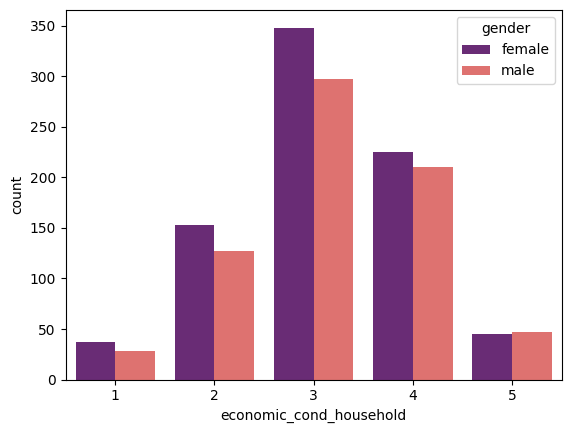

In [697]:
sns.countplot(data=el,x=el.economic_cond_household,hue=el.gender,palette='magma');

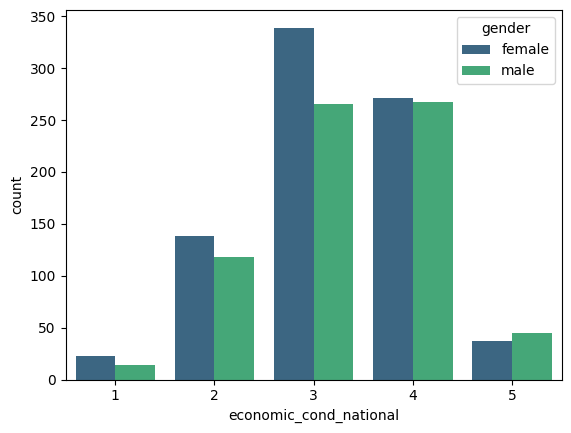

In [698]:
sns.countplot(data=el,x=el.economic_cond_national,hue=el.gender,palette='viridis');
### male number slightly higher under 5 category of the 'economic_cond_national' and 'economuc_cond_household' variable

9. Male number is slightly higher under 5 category of the 'economic_cond_national' variable.
10. For both, 'economical_cond_national' and 'economic_cond_household', the trend for females and males is similar.

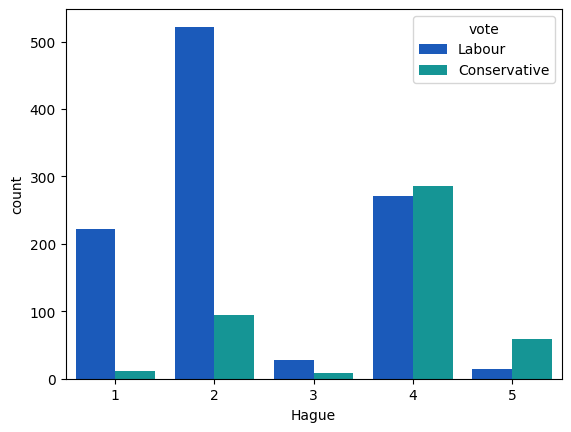

In [699]:
sns.countplot(data=el,x=el.Hague,hue=el.vote,palette='winter');

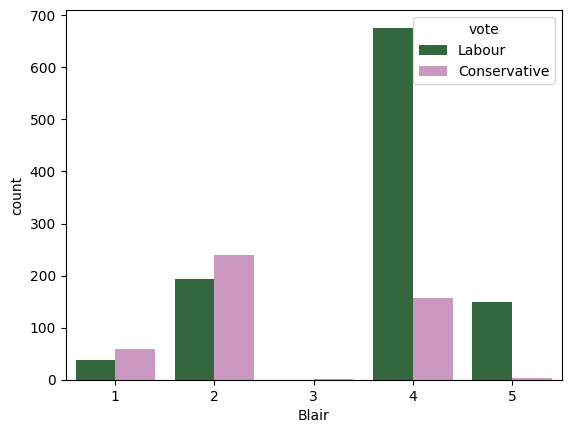

In [700]:
sns.countplot(data=el,x=el.Blair,hue=el.vote,palette='cubehelix');

In [701]:
el.vote.value_counts(normalize=True)

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

In [702]:
pd.crosstab(el.vote, el.Hague, margins=True, normalize=True)
### assessment of the Conservative leader by Conservative and Labour party supporters

Hague,1,2,3,4,5,All
vote,,,,,,
Conservative,0.007251,0.062624,0.005933,0.188530,0.038893,0.30323
Labour,0.146341,0.344100,0.018457,0.178642,0.009229,0.69677
All,0.153593,0.406724,0.024390,0.367172,0.048121,1.00000


In [703]:
pd.crosstab(el.vote, el.Blair, margins=True, normalize=True)
### assessment of the Labour leader by Conservative and Labour party supporters

Blair,1,2,3,4,5,All
vote,,,,,,
Conservative,0.038893,0.158207,0.000659,0.103494,0.001978,0.30323
Labour,0.025049,0.127884,0.000000,0.445616,0.098220,0.69677
All,0.063942,0.286091,0.000659,0.549110,0.100198,1.00000


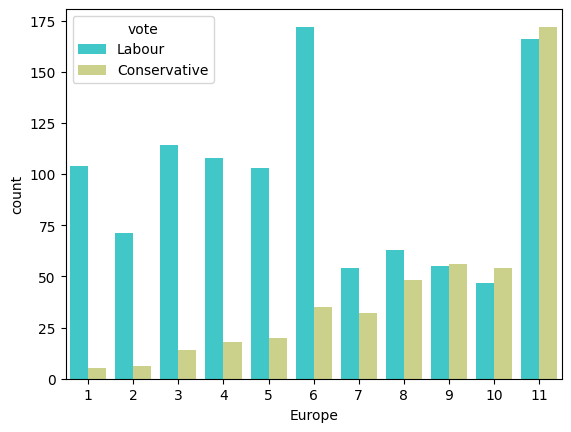

In [704]:
sns.countplot(data=el,x=el.Europe,hue=el.vote,palette='rainbow');

In [705]:
pd.crosstab(el.vote, el.Europe, margins=True, normalize=True)
### Is there a difference in the severity of Eurosceptic sentiments between Labour and Conservative records?

Europe,1,2,3,4,5,6,7,8,9,10,11,All
vote,,,,,,,,,,,,
Conservative,0.003296,0.003955,0.009229,0.011866,0.013184,0.023072,0.021094,0.031641,0.036915,0.035597,0.113382,0.30323
Labour,0.068556,0.046803,0.075148,0.071193,0.067897,0.113382,0.035597,0.041529,0.036256,0.030982,0.109426,0.69677
All,0.071852,0.050758,0.084377,0.083059,0.081081,0.136454,0.056691,0.073171,0.073171,0.066579,0.222808,1.00000


11. Eurosceptic sentiments in Conservative records are more servere than in Labour records with an exception, where 11 is the most popular rating under 'Europe' for both categories. 
12. If we only take a look till 10 in 'Europe' category, Labour and Conservative records are showing inverse trend.
13. Gender and party choice ('vote') do not appear to be correlated.

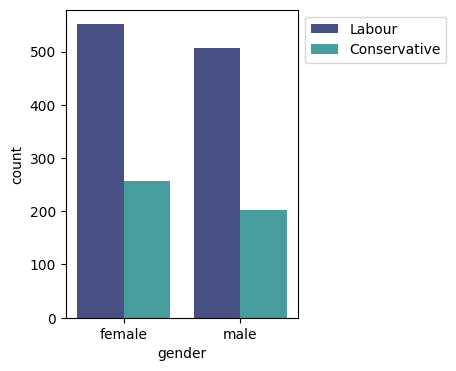

In [706]:
plt.figure(figsize=(3,4))
sns.countplot(data=el,x=el.gender,hue=el.vote,palette='mako')
plt.legend(bbox_to_anchor=(1,1));
### gender and party choice does not seem to be correlated

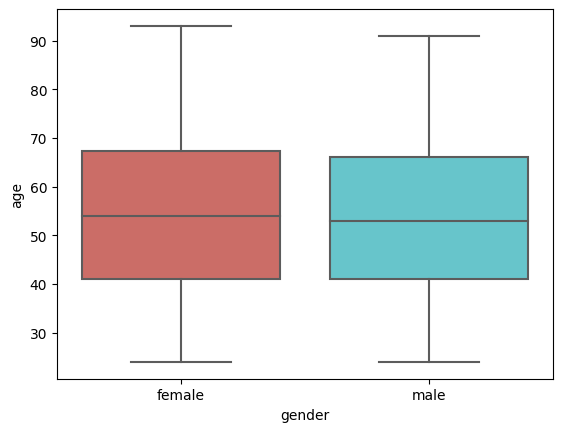

In [707]:
sns.boxplot(data=el,x=el.gender,y=el.age,palette='hls');
### no significant difference between female and male age distributions

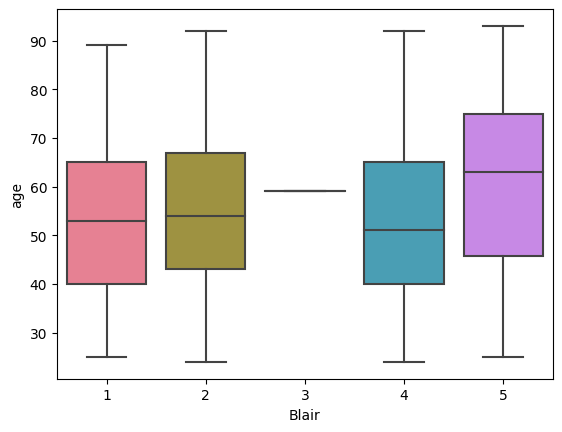

In [708]:
sns.boxplot(data=el,x=el.Blair,y=el.age,palette='husl');

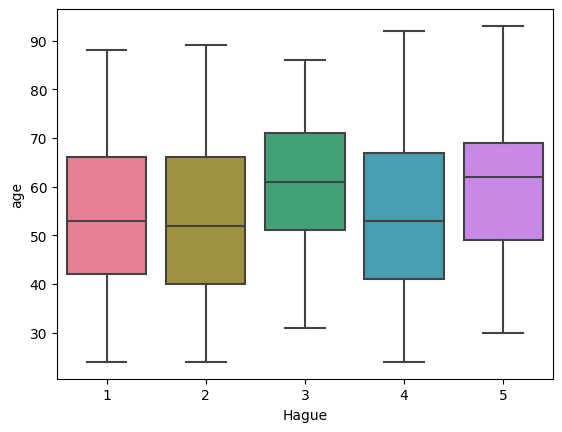

In [709]:
sns.boxplot(data=el,x=el.Hague,y=el.age,palette='husl');

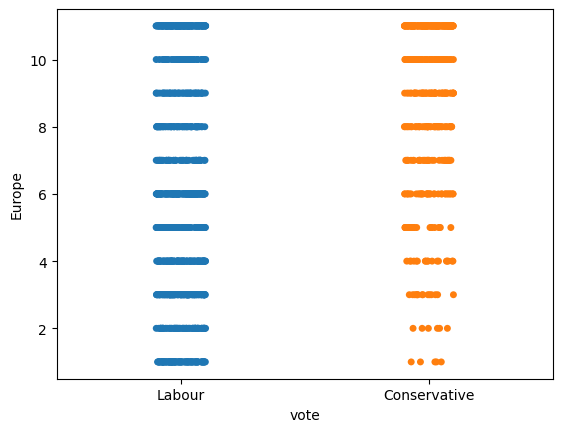

In [710]:
sns.stripplot(data=el,x=el.vote,y=el.Europe); 

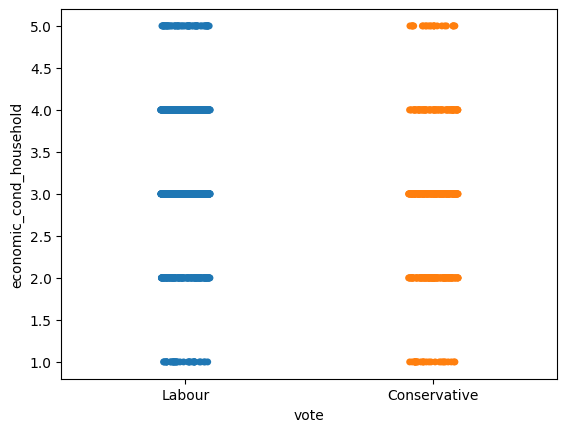

In [711]:
sns.stripplot(data=el,x=el.vote,y=el.economic_cond_household); 

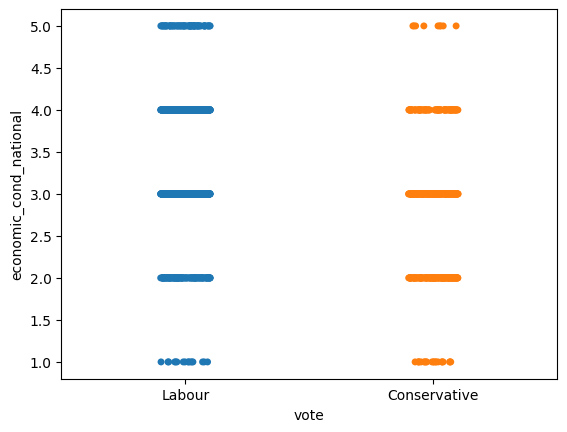

In [712]:
sns.stripplot(data=el,x=el.vote,y=el.economic_cond_national); 

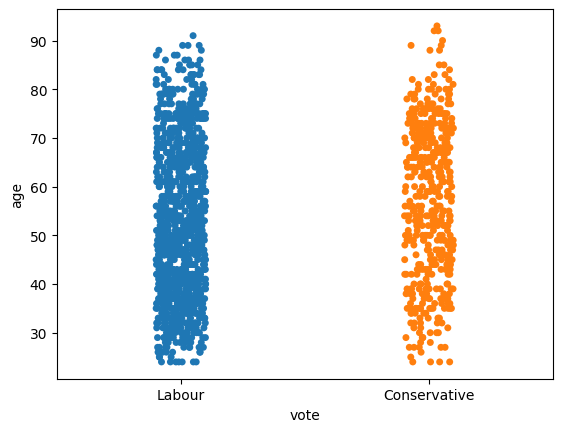

In [713]:
sns.stripplot(data=el,x=el.vote,y=el.age); 

1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not?(2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed. (4 marks)

In [714]:
el.vote=pd.Categorical(el.vote)
el.gender=pd.Categorical(el.gender)

In [715]:
el.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1517 non-null   category
 1   age                      1517 non-null   int64   
 2   economic_cond_national   1517 non-null   int64   
 3   economic_cond_household  1517 non-null   int64   
 4   Blair                    1517 non-null   int64   
 5   Hague                    1517 non-null   int64   
 6   Europe                   1517 non-null   int64   
 7   political_knowledge      1517 non-null   int64   
 8   gender                   1517 non-null   category
dtypes: category(2), int64(7)
memory usage: 130.3 KB


In [716]:
el_new=pd.get_dummies(el,columns=['gender'],drop_first=True)
el_new.vote=np.where(el_new.vote=='Labour',0,el_new.vote)
el_new.vote=np.where(el_new.vote=='Conservative',1,el_new.vote)

In [717]:
el_new.head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
0,0,43,3,3,4,1,2,2,0
1,0,36,4,4,4,4,5,2,1
2,0,35,4,4,5,2,3,2,1
3,0,24,4,2,2,1,4,0,0
4,0,41,2,2,1,1,6,2,1


In [718]:
el_new.vote.value_counts(normalize=True)
### data is imbalanced, hence, for some models SMOTE needs to be used to balance it

0    0.69677
1    0.30323
Name: vote, dtype: float64

In [719]:
el_new.vote.value_counts()

0    1057
1     460
Name: vote, dtype: int64

In [720]:
### creating another dataframe just to check the class overlap through the pairplot below
el_num_wclass=el_num.join(el_new['vote'])

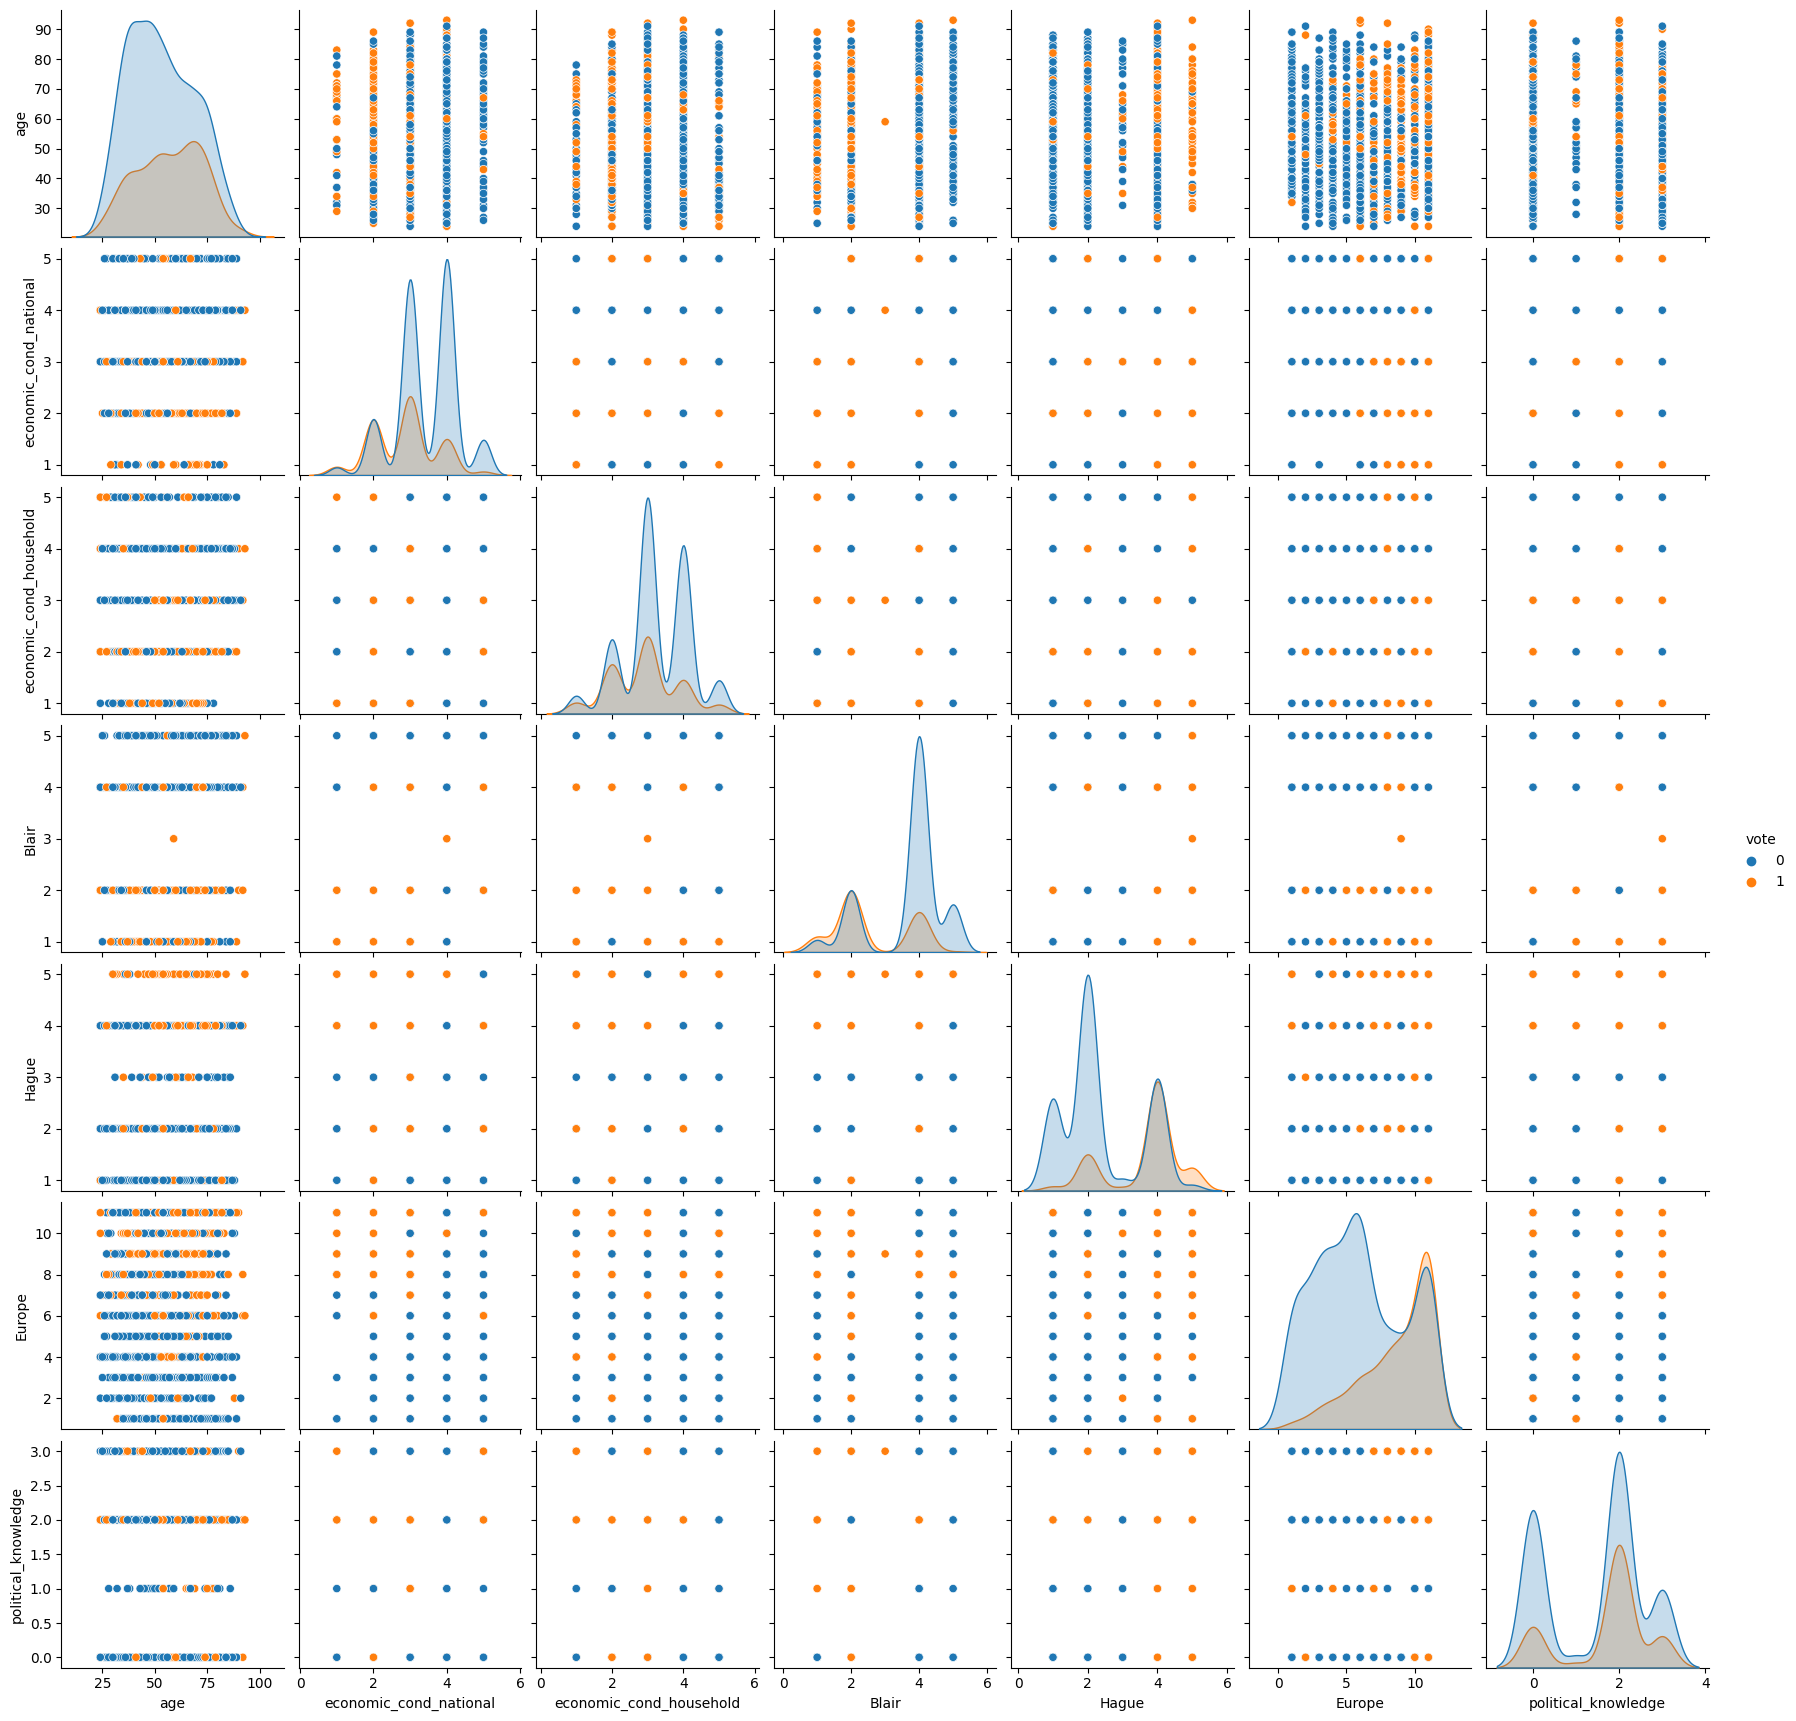

In [721]:
sns.pairplot(data=el_num_wclass,hue='vote',diag_kind='kde');

Scaling:

1. Scaling is required for Logistic Regression as well as LDA. This is because these models are sensitive to the scale of the inpt features and can make the model unstable if the features vary too much in their numerical values. Although, many features have close by numeric values, I will still go ahead and bring all the features to a standard scale.
2. MinMaxScaler can be used to achieve this as the 'gender' variable has been encoded. This step will ensure that the binary values for 'gender' remain the same, along with scaling all the other variables (continuous and ordinal).

In [722]:
el_new.vote=el_new.vote.astype('int64')
el_new.gender_male=el_new.gender_male.astype('int64')

In [723]:
X=el_new.drop('vote',axis=1)
y=el_new['vote']

In [724]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [725]:
X_train.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
529,70,4,3,2,4,10,2,0
141,62,4,3,5,2,1,2,0
1097,54,3,3,4,2,1,2,0
1010,76,4,4,5,2,11,0,0
663,37,4,3,4,4,10,2,1


In [726]:
X_test.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
726,43,2,2,4,2,9,0,0
814,48,3,3,4,1,2,3,0
1474,56,4,3,2,4,8,0,1
1477,50,4,2,2,1,3,2,1
51,33,2,3,4,4,9,0,1


In [727]:
y_train.head()

529     0
141     0
1097    0
1010    0
663     0
Name: vote, dtype: int64

In [728]:
y_test.head()

726     0
814     0
1474    0
1477    0
51      0
Name: vote, dtype: int64

Modeling: 22 marks

1.4 Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting). (4 marks)

In [729]:
### using MinMaxScaler() so our continuous and ordinal variables are scaled but the binary variables remains unaffected
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Logistic Regression:

In [730]:
### TRAIN
from sklearn.metrics import confusion_matrix,classification_report
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_predict1=log_model.predict(X_train)
model_score=log_model.score(X_train,y_train)
print(model_score)
print(confusion_matrix(y_train,y_predict1))
print(classification_report(y_train,y_predict1))

0.8341187558906692
[[657  69]
 [107 228]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       726
           1       0.77      0.68      0.72       335

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



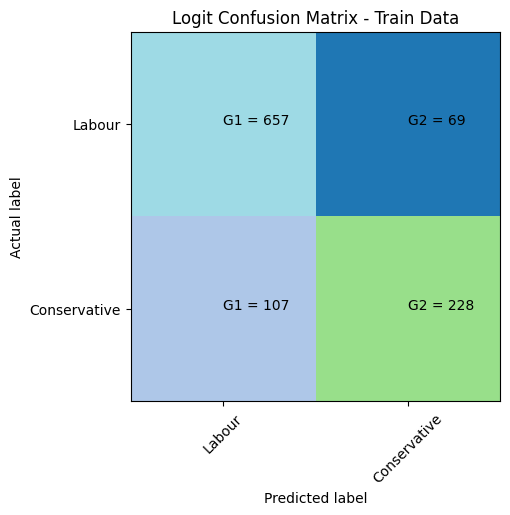

In [731]:
### Logit confusion matrix for TRAIN SET
cm=confusion_matrix(y_train, y_predict1)
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap='tab20')
classNames = ['Labour', 'Conservative']
plt.title('Logit Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [732]:
### TEST
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_predict2=log_model.predict(X_test)
model_score=log_model.score(X_test,y_test)
print(model_score)
print(confusion_matrix(y_test,y_predict2))
print(classification_report(y_test,y_predict2))

0.831140350877193
[[306  25]
 [ 52  73]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       331
           1       0.74      0.58      0.65       125

    accuracy                           0.83       456
   macro avg       0.80      0.75      0.77       456
weighted avg       0.82      0.83      0.82       456



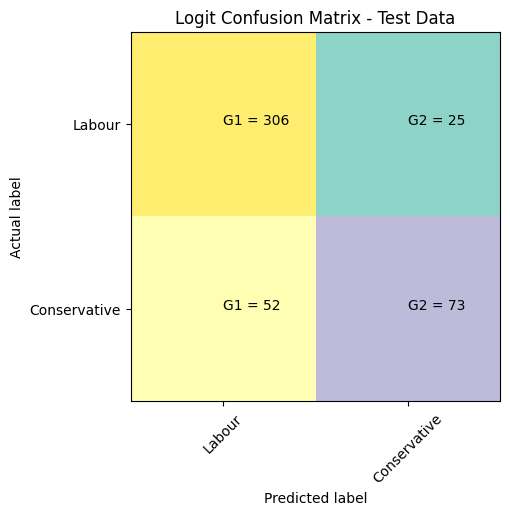

In [733]:
### Logit confusion matrix for TEST SET
cm=confusion_matrix(y_test, y_predict2)
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap='Set3')
classNames = ['Labour', 'Conservative']
plt.title('Logit Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Interpretation of the Logit Confusion Matrix and the Final Equation: 

1. (Logit) In the above confusion matrix:
G1 = 306 is True Positive
G1 = 52 is False Positive
G2 = 73 is True Negative
G2 = 25 is False Negative

2. Logit equation:
Y = -2.45857996 + X1(1.03420336) + X2(-1.22634905) + X3(-0.37046377) + X4(-2.32365965) + X5(3.18940252) + X6(1.80540481) + X7(1.10605656) + X8(-0.03399354)

In [734]:
### Logit equation
log_model.intercept_

array([-2.45857996])

In [735]:
log_model.coef_

array([[ 1.03420336, -1.22634905, -0.37046377, -2.32365965,  3.18940252,
         1.80540481,  1.10605656, -0.03399354]])

In [736]:
### Assessment of Hague and Blair seem to be the most important predictor variables for this problem statement
X.columns

Index(['age', 'economic_cond_national', 'economic_cond_household', 'Blair',
       'Hague', 'Europe', 'political_knowledge', 'gender_male'],
      dtype='object')

LDA:

In [737]:
### TRAIN
clf=LinearDiscriminantAnalysis()
lda_model=clf.fit(X_train,y_train)
y_predict3=lda_model.predict(X_train)
model_score3=lda_model.score(X_train,y_train)
print(model_score3)
print(confusion_matrix(y_train,y_predict3))
print(classification_report(y_train,y_predict3))

0.8331762488218661
[[648  78]
 [ 99 236]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       726
           1       0.75      0.70      0.73       335

    accuracy                           0.83      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.83      0.83      0.83      1061



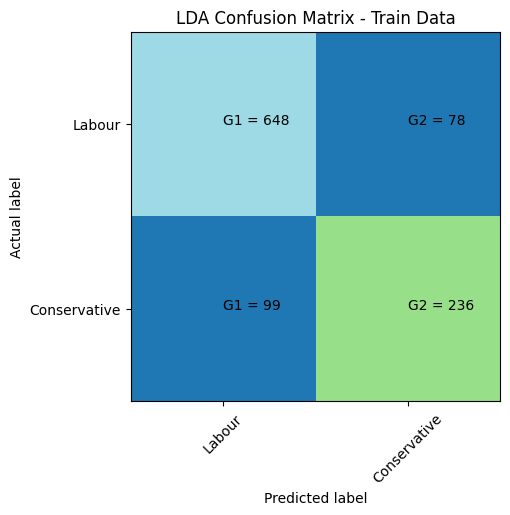

In [738]:
### LDA confusion matrix for TRAIN SET
cm=confusion_matrix(y_train, y_predict3)
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap='tab20')
classNames = ['Labour', 'Conservative']
plt.title('LDA Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [739]:
### TEST
clf=LinearDiscriminantAnalysis()
lda_model=clf.fit(X_train,y_train)
y_predict4=lda_model.predict(X_test)

In [740]:
#data=el_new.drop('vote',axis=1)
#Cor1=data.corr()
#sns.heatmap(Cor1,annot=True,cmap='crest');

### checked correlation, no significant pair found

In [741]:
model_score4=lda_model.score(X_test,y_test)
print(model_score4)
print(confusion_matrix(y_test,y_predict4))
print(classification_report(y_test,y_predict4))

0.831140350877193
[[301  30]
 [ 47  78]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       331
           1       0.72      0.62      0.67       125

    accuracy                           0.83       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.83      0.83      0.83       456



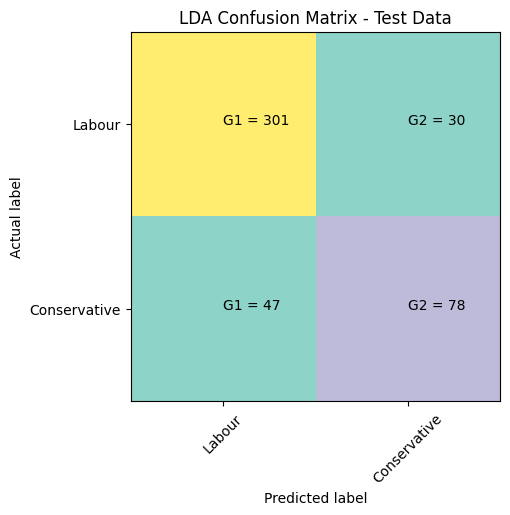

In [742]:
cm=confusion_matrix(y_test, y_predict4)
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap='Set3')
classNames = ['Labour', 'Conservative']
plt.title('LDA Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Interpretation of the LDA Confusion Matrix and the Final Equation: 

1. (LDA) In the above confusion matrix:
G1 = 301 is True Positive
G1 = 47 is False Positive
G2 = 78 is True Negative
G2 = 30 is False Negative

2. LDA equation:
Y = -3.15378745 + X(1.61916494) + X2(-1.43546581) + X3(-0.35288673) + X4(-3.08821089) +  X5(4.1079564) + X6(2.12568903) + X7(1.50609139) + X8(0.00964594)

In [743]:
lda_model.intercept_

array([-3.15378745])

In [744]:
lda_model.coef_

array([[ 1.61916494, -1.43546581, -0.35288673, -3.08821089,  4.1079564 ,
         2.12568903,  1.50609139,  0.00964594]])

Observations on model validation:

1. For both, Logit and LDA models, the accuracy score on train set is slightly higher than for the test set. Moreover, the accuracy score is not extraordinarily high on the training set followed by poor performance on the test set. With this, I concluded that the model is not overfit or underfit.

Inference for Logit and LDA:

1. Both the models have performed decently on the test set with good precision score for class 1.
2. The confusion matrix for both the models on test data shows us that the model was able to predict the class correctly for 379 test set records. It gave 77 wrong predictions. Note that these numbers are the same for both the models.
3. In our prediction problem, both the classes are equally important and of interest. This gives us the freedom to use a model that gives a good score for either of the classes.
4. We can see that the f1 scores for 0 class are relatively powerful.

1.5 Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting). (4 marks)

In [745]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

In [746]:
scores=[]
for k in range(1,50):
    NNH=KNeighborsClassifier(n_neighbors=k,weights='distance')
    NNH.fit(X_train,y_train)
    NNHscore=NNH.score(X_test, y_test)
    scores.append(NNHscore)

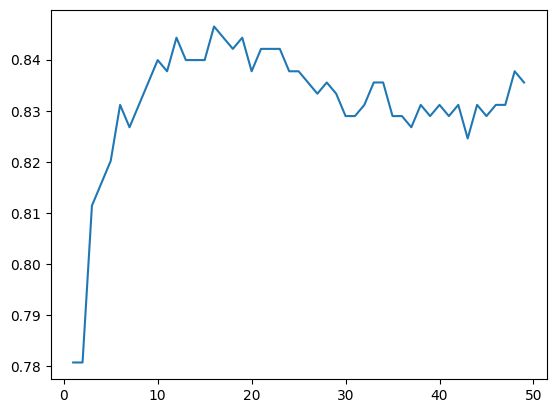

In [747]:
plt.plot(range(1,50),scores);

In [748]:
### TRAIN

### using 19 as the value for k
NNH=KNeighborsClassifier(n_neighbors=19,weights='distance') 
# weights='distance' makes sure that the points in the neighbourhood are measured by distance and not considered equal
knn_model=NNH.fit(X_train,y_train)
y_predict5=knn_model.predict(X_train)
model_score5=knn_model.score(X_train,y_train)
print(model_score5)
print(confusion_matrix(y_train,y_predict5))
print(classification_report(y_train,y_predict5))

1.0
[[726   0]
 [  0 335]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       726
           1       1.00      1.00      1.00       335

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



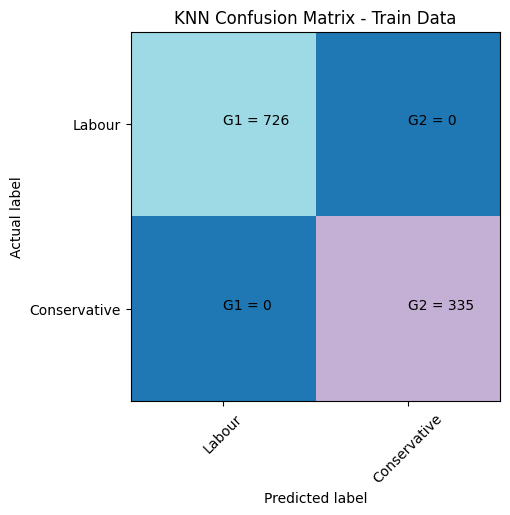

In [749]:
### KNN train data confusion matrix
cm=confusion_matrix(y_train,y_predict5)
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap='tab20')
classNames = ['Labour', 'Conservative']
plt.title('KNN Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

1. Value for 'k' has been decided after checking the accuracy from all values of k from 1 to 50.
2. In general, too small a value for k will lead to overfitting, and too large a value will lead to underfitting.
3. Moreover, low value for 'k' creates high variance in the data and large 'k' value has small variance.
4. Therefore, the value of 'k' somewhere in the middle is always recommended, but there is no right way to select the value of 'k'.

In [750]:
### TEST

### using 19 as the value for k
NNH=KNeighborsClassifier(n_neighbors=19,weights='distance') 
# weights='distance' makes sure that the points in the neighbourhood are measured by distance and not considered equal
knn_model=NNH.fit(X_train,y_train)
y_predict6=knn_model.predict(X_test)
model_score6=lda_model.score(X_test,y_test)
print(model_score6)
print(confusion_matrix(y_test,y_predict6))
print(classification_report(y_test,y_predict6))

0.831140350877193
[[304  27]
 [ 44  81]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       331
           1       0.75      0.65      0.70       125

    accuracy                           0.84       456
   macro avg       0.81      0.78      0.80       456
weighted avg       0.84      0.84      0.84       456



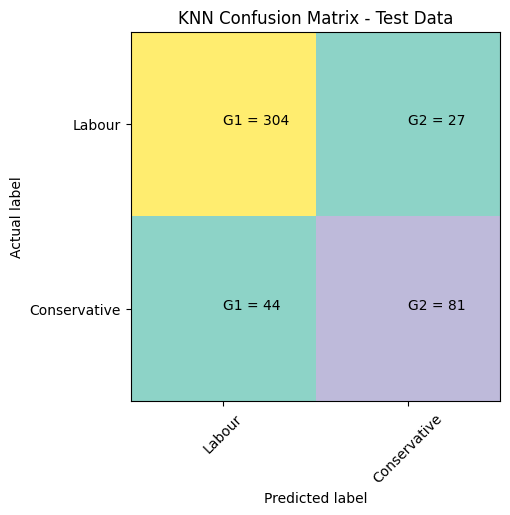

In [751]:
### KNN test data confusion matrix
cm=confusion_matrix(y_test, y_predict6)
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap='Set3')
classNames = ['Labour', 'Conservative']
plt.title('KNN Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

5. KNN gave 1.00 accuracy on the training set. Moreover, it also gave an accuracy score of 0.83 on test set. The model is currently seeming to overfit and not generalizing well on unseen data.
6. A major concern is imbalanced data. However, after using SMOTE to balance the data, the model was still an overfit. Hence, I have reverted to the base model as the final one. At a later stage, I will optimize this model through Grid Search CV and tune it.

In [752]:
oversample=SMOTE()
Xb,yb=oversample.fit_resample(X,y)
yb.value_counts()
### using smote to balance the dataset to check if model performance improves

0    1057
1    1057
Name: vote, dtype: int64

In [753]:
Xtrain,Xtest,ytrain,ytest=train_test_split(Xb,yb,test_size=0.30,random_state=42)

In [754]:
Xtrain.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
1280,85,2,3,4,2,11,3,1
1157,33,4,5,5,4,2,2,0
1568,57,2,2,2,4,4,1,1
15,51,4,4,4,4,5,0,1
819,51,3,4,4,2,11,2,0


In [755]:
Xtest.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
596,50,3,2,2,2,3,2,1
1995,74,2,3,3,4,9,0,0
422,48,4,3,4,1,3,2,1
289,75,2,3,4,4,8,2,0
196,40,4,2,2,2,7,2,0


In [756]:
scores=[]
for k in range(1,50):
    NNH=KNeighborsClassifier(n_neighbors=k,weights='distance')
    NNH.fit(Xtrain,ytrain)
    NNHscore=NNH.score(Xtest, ytest)
    scores.append(NNHscore)

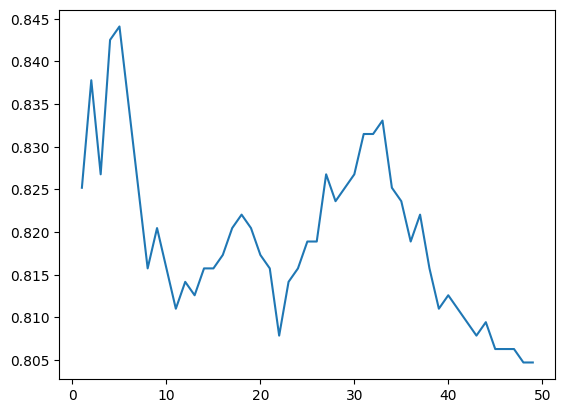

In [757]:
plt.plot(range(1,50),scores);

In [758]:
### POST SMOTE - TRAIN

### using 7 as the value for k
NNH=KNeighborsClassifier(n_neighbors=7,weights='distance') 
# weights='distance' makes sure that the points in the neighbourhood are measured by distance and not considered equal
knn_model2=NNH.fit(Xtrain.values,ytrain)
y_predict52=knn_model.predict(Xtrain.values)
model_score52=knn_model2.score(Xtrain.values,ytrain)
print(model_score52)
print(confusion_matrix(ytrain,y_predict52))
print(classification_report(ytrain,y_predict52))

0.9993238674780257
[[738   3]
 [729   9]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       741
           1       0.75      0.01      0.02       738

    accuracy                           0.51      1479
   macro avg       0.63      0.50      0.35      1479
weighted avg       0.63      0.51      0.35      1479



In [759]:
### POST SMOTE - TEST

### using 7 as the value for k
NNH=KNeighborsClassifier(n_neighbors=7,weights='distance') 
# weights='distance' makes sure that the points in the neighbourhood are measured by distance and not considered equal
knn_model2=NNH.fit(Xtrain.values,ytrain)
y_predict62=knn_model.predict(Xtest.values)
model_score62=knn_model2.score(Xtest.values,ytest)
print(model_score62)
print(confusion_matrix(ytest,y_predict62))
print(classification_report(ytest,y_predict62))

0.8251968503937008
[[316   0]
 [312   7]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       316
           1       1.00      0.02      0.04       319

    accuracy                           0.51       635
   macro avg       0.75      0.51      0.36       635
weighted avg       0.75      0.51      0.35       635



Naive Bayes:

In [760]:
### TRAIN
model_nb=GaussianNB()
model_nb.fit(X_train, y_train)
y_predict7=model_nb.predict(X_train)
model_score7=model_nb.score(X_train,y_train)
print(model_score7)
print(classification_report(y_train,y_predict7))
print(confusion_matrix(y_train,y_predict7))

0.8294062205466541
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       726
           1       0.75      0.70      0.72       335

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061

[[646  80]
 [101 234]]


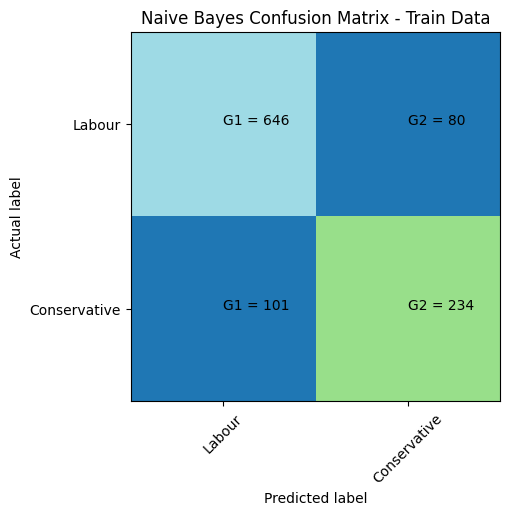

In [761]:
### Naive Bayes' train data confusion matrix
cm=confusion_matrix(y_train,y_predict7)
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap='tab20')
classNames = ['Labour', 'Conservative']
plt.title('Naive Bayes Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [762]:
### TEST
model_nb=GaussianNB()
model_nb.fit(X_train, y_train)
y_predict8=model_nb.predict(X_test)
model_score8=model_nb.score(X_test,y_test)
print(model_score8)
print(classification_report(y_test,y_predict8))
print(confusion_matrix(y_test,y_predict8))

0.8442982456140351
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       331
           1       0.73      0.69      0.71       125

    accuracy                           0.84       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.84      0.84      0.84       456

[[299  32]
 [ 39  86]]


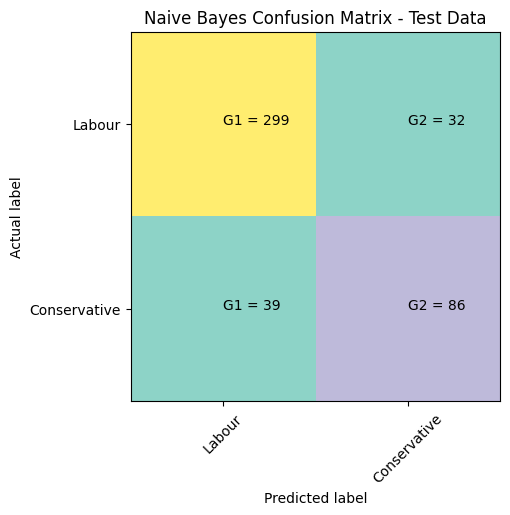

In [763]:
### Naive Bayes' test data confusion matrix
cm=confusion_matrix(y_test,y_predict8)
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap='Set3')
classNames = ['Labour', 'Conservative']
plt.title('Naive Bayes Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [764]:
### POST SMOTE - TRAIN
model_nb1=GaussianNB()
model_nb1.fit(Xtrain, ytrain)
y_predict72=model_nb1.predict(Xtrain)
model_score72=model_nb1.score(Xtrain,ytrain)
print(model_score72)
print(classification_report(ytrain,y_predict72))
print(confusion_matrix(ytrain,y_predict72))

0.8194726166328601
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       741
           1       0.82      0.81      0.82       738

    accuracy                           0.82      1479
   macro avg       0.82      0.82      0.82      1479
weighted avg       0.82      0.82      0.82      1479

[[611 130]
 [137 601]]


In [765]:
### POST SMOTE - TEST
model_nb2=GaussianNB()
model_nb2.fit(Xtrain, ytrain)
y_predict82=model_nb2.predict(Xtest)
model_score82=model_nb2.score(Xtest,ytest)
print(model_score82)
print(classification_report(ytest,y_predict82))
print(confusion_matrix(ytest,y_predict82))

0.8377952755905512
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       316
           1       0.82      0.86      0.84       319

    accuracy                           0.84       635
   macro avg       0.84      0.84      0.84       635
weighted avg       0.84      0.84      0.84       635

[[257  59]
 [ 44 275]]


7. For Naive Bayes' model, the base model is performing the best in comparison with SMOTE balanced training and test data sets.
8. The model accuracy score on test data is slightly outperforming the model on training data.
9. Score for train data: 82.94%. Score for test data: 84.43%.
10. The model is performing better for the 0 class but since, according to our problem statement, both the parties are of interest, we can use the model to predict outcomes.

1.6 Model Tuning (4 pts), Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances. (7 marks)

Random Forest (Bagging):

In [766]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=50,max_features=7,random_state=42)
rfcl=rfcl.fit(X_train,y_train)

1. Random Forest is overfitting. Therefore, it needs to be tuned. (Tuned below in the Grid Search CV section.)

In [767]:
### random forest - train set
y_predict23=rfcl.predict(X_train)
model_score23=rfcl.score(X_train,y_train)
print(model_score23)
print(classification_report(y_train,y_predict23))
print(confusion_matrix(y_train,y_predict23))

0.998114985862394
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       726
           1       1.00      0.99      1.00       335

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061

[[726   0]
 [  2 333]]


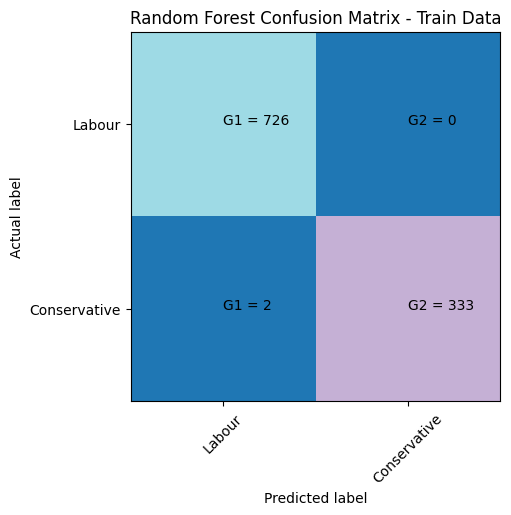

In [768]:
### Random forest train data confusion matrix
cm=confusion_matrix(y_train,y_predict23)
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap='tab20')
classNames = ['Labour', 'Conservative']
plt.title('Random Forest Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [769]:
### random forest - test set
y_predict24=rfcl.predict(X_test)
model_score24=rfcl.score(X_test,y_test)
print(model_score24)
print(classification_report(y_test,y_predict24))
print(confusion_matrix(y_test,y_predict24))

0.8223684210526315
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       331
           1       0.70      0.62      0.66       125

    accuracy                           0.82       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.82      0.82      0.82       456

[[297  34]
 [ 47  78]]


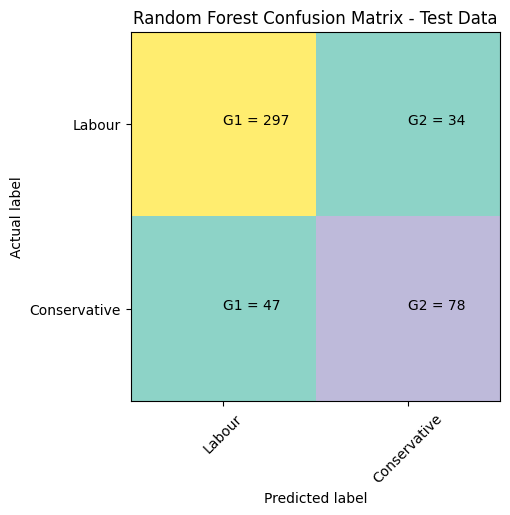

In [770]:
### Random forest test data confusion matrix
cm=confusion_matrix(y_test,y_predict24)
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap='Set3')
classNames = ['Labour', 'Conservative']
plt.title('Random Forest Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [771]:
print(pd.DataFrame(rfcl.feature_importances_,columns = ["Imp"],index=X.columns))

                              Imp
age                      0.219386
economic_cond_national   0.076567
economic_cond_household  0.069362
Blair                    0.139384
Hague                    0.234336
Europe                   0.146279
political_knowledge      0.083348
gender_male              0.031338


AdaBoosting:

In [772]:
from sklearn.ensemble import AdaBoostClassifier
abcl1=AdaBoostClassifier(n_estimators=30,random_state=42)
abcl1=abcl1.fit(X_train,y_train)

In [773]:
### adaboosting on TRAIN data
y_predict17=abcl1.predict(X_train)
model_score17=abcl1.score(X_train,y_train)
print(model_score17)
print(classification_report(y_train,y_predict17))
print(confusion_matrix(y_train,y_predict17))

0.8416588124410933
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       726
           1       0.77      0.71      0.74       335

    accuracy                           0.84      1061
   macro avg       0.82      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061

[[654  72]
 [ 96 239]]


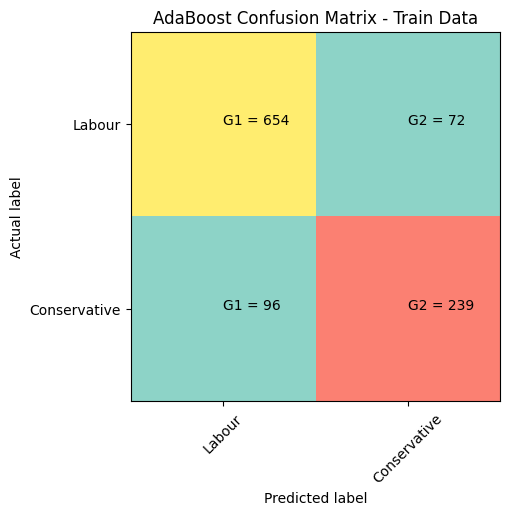

In [774]:
### adaboosting confusion matrix for TRAIN set
cm=confusion_matrix(y_train,y_predict17)
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap='Set3')
classNames = ['Labour', 'Conservative']
plt.title('AdaBoost Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [775]:
### adaboosting on TEST data
y_predict18=abcl1.predict(X_test)
model_score18=abcl1.score(X_test,y_test)
print(model_score18)
print(classification_report(y_test,y_predict18))
print(confusion_matrix(y_test,y_predict18))

0.8289473684210527
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       331
           1       0.70      0.65      0.68       125

    accuracy                           0.83       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.83      0.83      0.83       456

[[297  34]
 [ 44  81]]


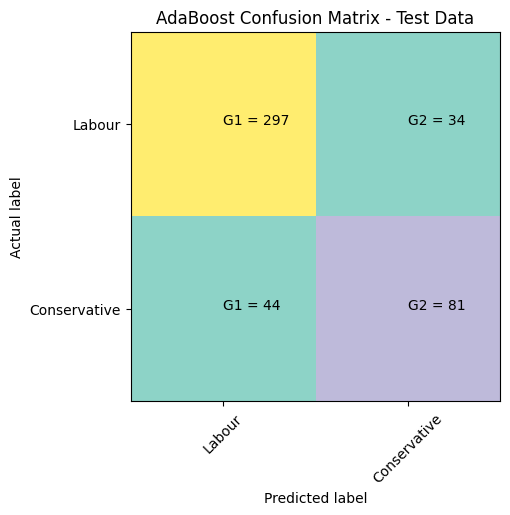

In [776]:
### adaboosting confusion matrix for TEST set
cm=confusion_matrix(y_test,y_predict18)
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap='Set3')
classNames = ['Labour', 'Conservative']
plt.title('AdaBoost Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Gradient Boosting:

In [777]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl1=GradientBoostingClassifier(n_estimators=50,random_state=1)
gbcl1=gbcl1.fit(X_train,y_train)

In [778]:
### gradient boosting for TRAIN set
y_predict19=gbcl1.predict(X_train)
model_score19=gbcl1.score(X_train,y_train)
print(model_score19)
print(classification_report(y_train,y_predict19))
print(confusion_matrix(y_train,y_predict19))

0.8680490103675778
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       726
           1       0.82      0.74      0.78       335

    accuracy                           0.87      1061
   macro avg       0.85      0.83      0.84      1061
weighted avg       0.87      0.87      0.87      1061

[[673  53]
 [ 87 248]]


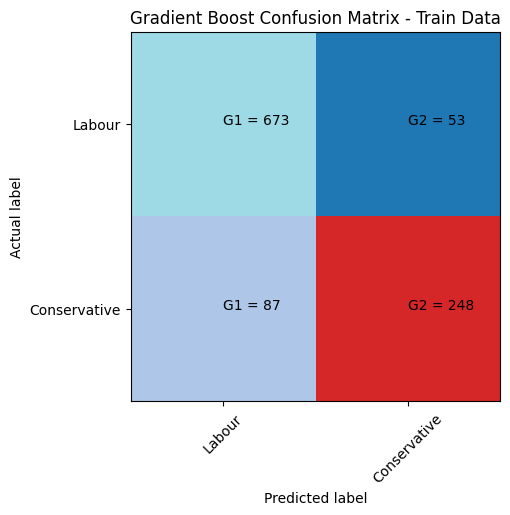

In [779]:
### confusion matrix for gradient boosting - TRAIN
cm=confusion_matrix(y_train,y_predict19)
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap='tab20')
classNames = ['Labour', 'Conservative']
plt.title('Gradient Boost Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [780]:
### gradient boosting for TEST set
y_predict20=gbcl1.predict(X_test)
model_score20=gbcl1.score(X_test,y_test)
print(model_score20)
print(classification_report(y_test,y_predict20))
print(confusion_matrix(y_test,y_predict20))

0.8442982456140351
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       331
           1       0.75      0.66      0.70       125

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.84      0.84      0.84       456

[[303  28]
 [ 43  82]]


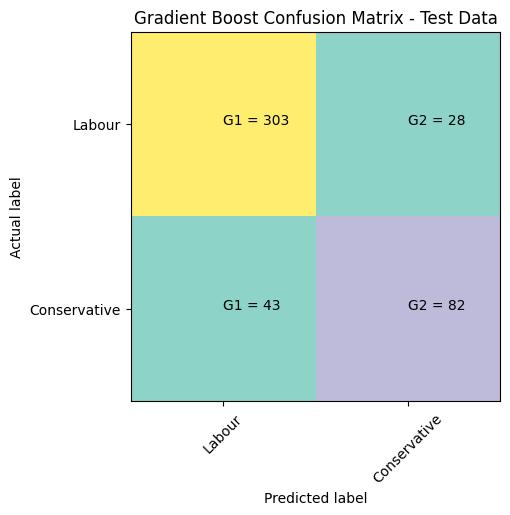

In [781]:
### confusion matrix for gradient boosting - TEST
cm=confusion_matrix(y_test,y_predict20)
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap='Set3')
classNames = ['Labour', 'Conservative']
plt.title('Gradient Boost Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [782]:
print(pd.DataFrame(gbcl1.feature_importances_,columns=["Imp"],index=X.columns))

                              Imp
age                      0.078621
economic_cond_national   0.054884
economic_cond_household  0.013909
Blair                    0.214824
Hague                    0.406475
Europe                   0.113464
political_knowledge      0.117433
gender_male              0.000390


---> Grid Search CV Implementation for All Models:

In [783]:
from sklearn.model_selection import GridSearchCV 

In [784]:
### LOGIT
param_grid_logit={
    'penalty':['l2','none'],
    'solver':['sag','lbfgs','newton-cg','saga'],
    'tol':[0.0001,0.00001]
    }
r_logit=LogisticRegression()
grid_search1=GridSearchCV(estimator=r_logit,param_grid=param_grid_logit,cv=3,n_jobs=2,scoring='f1')
grid_search1.fit(X_train,y_train)
print(grid_search1.best_params_)

{'penalty': 'none', 'solver': 'sag', 'tol': 0.0001}


In [785]:
## building logit model - train
r_logit1=LogisticRegression(penalty='none',solver='sag',tol=0.0001)
r_logit1.fit(X_train,y_train)
y_predict9=r_logit1.predict(X_train)
model_score9=r_logit1.score(X_train,y_train)
print(model_score9)
print(confusion_matrix(y_train,y_predict9))
print(classification_report(y_train,y_predict9))

0.8360037700282752
[[655  71]
 [103 232]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       726
           1       0.77      0.69      0.73       335

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.81      1061
weighted avg       0.83      0.84      0.83      1061



In [786]:
## building logit model - test
r_logit2=LogisticRegression(penalty='none',solver='sag',tol=0.0001)
r_logit2.fit(X_train,y_train)
y_predict10=r_logit2.predict(X_test)
model_score10=r_logit2.score(X_test,y_test)
print(model_score10)
print(confusion_matrix(y_test,y_predict10))
print(classification_report(y_test,y_predict10))

0.831140350877193
[[304  27]
 [ 50  75]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       331
           1       0.74      0.60      0.66       125

    accuracy                           0.83       456
   macro avg       0.80      0.76      0.77       456
weighted avg       0.82      0.83      0.83       456



Model Tuning:

1. For Logit, the base model is still slightly outperforming the model on which Grid Search CV was applied. Due to this, I will choose to use the base model with an accuracy score of 0.8333 instead of the grid search model with the score of 0.8311.

In [787]:
### LDA
param_grid_lda={
    'solver':['svd','lsqr','eigen']
    }
r_lda=LinearDiscriminantAnalysis()
grid_search2=GridSearchCV(estimator=r_lda,param_grid=param_grid_lda,cv=5,n_jobs=2,scoring='f1')
grid_search2.fit(X_train,y_train)
print(grid_search2.best_params_)

{'solver': 'svd'}


2. For LDA, the default parameter of _solver='svd' is performing the best. Therefore, the base model is already tuned for optimal performance.

In [788]:
### KNN
param_grid_knn={
    'n_neighbors':[5,19,25,29,31,33,35],
    'weights':['distance','uniform'],
    'leaf_size':[1,10,20,30,50,100]
    }
r_knn=KNeighborsClassifier()
grid_search3=GridSearchCV(estimator=r_knn,param_grid=param_grid_knn,cv=5,n_jobs=2,scoring='f1')
grid_search3.fit(X_train,y_train)
print(grid_search3.best_params_)

{'leaf_size': 1, 'n_neighbors': 33, 'weights': 'uniform'}


In [789]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [790]:
## building KNN model - train
r_knn1=KNeighborsClassifier(n_neighbors=33,weights='uniform',leaf_size=1)
r_knn1.fit(X_train,y_train)
y_predict9=r_knn1.predict(X_train)
model_score9=r_knn1.score(X_train,y_train)
print(model_score9)
print(confusion_matrix(y_train,y_predict9))
print(classification_report(y_train,y_predict9))

0.8303487276154571
[[660  66]
 [114 221]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       726
           1       0.77      0.66      0.71       335

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.80      1061
weighted avg       0.83      0.83      0.83      1061



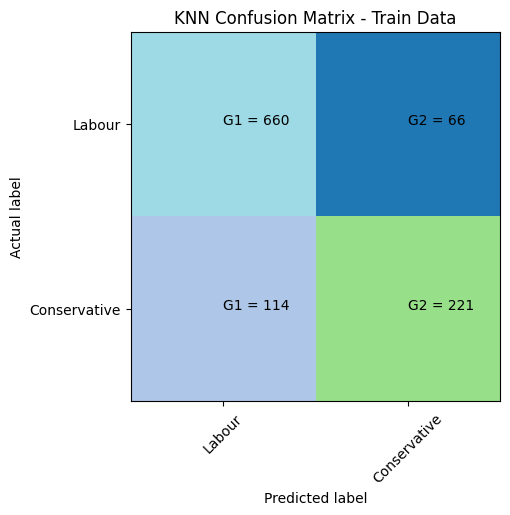

In [791]:
### confusion matrix for KNN - TRAIN
cm=confusion_matrix(y_train,y_predict9)
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap='tab20')
classNames = ['Labour', 'Conservative']
plt.title('KNN Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [792]:
## building KNN model - test
r_knn2=KNeighborsClassifier(n_neighbors=33,weights='uniform',leaf_size=1)
r_knn2.fit(X_train,y_train)
y_predict10=r_knn2.predict(X_test)
model_score10=r_knn2.score(X_test,y_test)
print(model_score10)
print(confusion_matrix(y_test,y_predict10))
print(classification_report(y_test,y_predict10))

0.831140350877193
[[304  27]
 [ 50  75]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       331
           1       0.74      0.60      0.66       125

    accuracy                           0.83       456
   macro avg       0.80      0.76      0.77       456
weighted avg       0.82      0.83      0.83       456



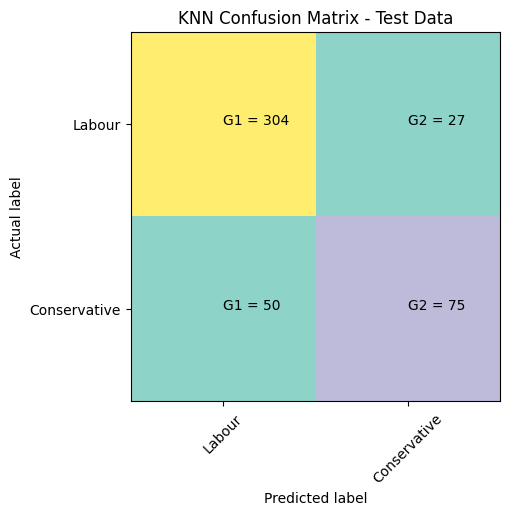

In [793]:
### confusion matrix for KNN - TEST
cm=confusion_matrix(y_test,y_predict10)
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap='Set3')
classNames = ['Labour', 'Conservative']
plt.title('KNN Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

3. For KNN, Grid Search CV has given different hyperparameters for optimized performance. While the base model had 'weights='distance'', the tuned model has weights set to 'uniform'. The n_neighbors parameter has also been changed from 19 to 33 and is solving the problem of overfitting, hence, making the model stable. I'm finalizing this model for use on unseen data.
4. Additionally, the KNN model is working well with leaf_size=1.

In [794]:
### Naive Bayes'
param_grid_nb={
    'var_smoothing':[1e-323,1e-200,1e-120,1e-70,1e-50,1e-10,1e-8]
    }
r_nb=GaussianNB()
grid_search4=GridSearchCV(estimator=r_nb,param_grid=param_grid_nb,cv=5,n_jobs=2,scoring='f1')
grid_search4.fit(X_train,y_train)
print(grid_search4.best_params_)

{'var_smoothing': 1e-323}


In [795]:
## building Naive Bayes' model - train
model_nb3=GaussianNB(var_smoothing=1e-323)
model_nb3.fit(X_train, y_train)
y_predict11=model_nb3.predict(X_train)
model_score11=model_nb3.score(X_train,y_train)
print(model_score11)
print(classification_report(y_train,y_predict11))
print(confusion_matrix(y_train,y_predict11))

0.8294062205466541
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       726
           1       0.75      0.70      0.72       335

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061

[[646  80]
 [101 234]]


In [796]:
## building Naive Bayes' model - test
model_nb4=GaussianNB(var_smoothing=1e-323)
model_nb4.fit(X_train, y_train)
y_predict12=model_nb4.predict(X_test)
model_score12=model_nb4.score(X_test,y_test)
print(model_score12)
print(classification_report(y_test,y_predict12))
print(confusion_matrix(y_test,y_predict12))

0.8442982456140351
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       331
           1       0.73      0.69      0.71       125

    accuracy                           0.84       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.84      0.84      0.84       456

[[299  32]
 [ 39  86]]


5. Naive Bayes' model is not showing much change when 'var_smoothing' hyperparameter is tuned. Hence, choosing the base model as the final one.

In [797]:
### Random Forest
param_grid_rm={
    'n_estimators':[20,30,40],
    'max_features':[2,5,7],
    'max_depth':[3,5,7,15],
    'min_samples_split':[30,50,70],
    'min_samples_leaf':[5,10,20],
    'bootstrap':[True,False]
    }
r_rm=RandomForestClassifier()
grid_search5=GridSearchCV(
    estimator=r_rm,param_grid=param_grid_rm,cv=5,n_jobs=-1,scoring='f1'
)
grid_search5.fit(X_train,y_train)
print(grid_search5.best_params_)

{'bootstrap': False, 'max_depth': 15, 'max_features': 2, 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 20}


In [798]:
### Random Forest
param_grid_rm={
    'n_estimators':[20,30,40,70],
    'max_features':[2,3,5,7],
    'max_depth':[3,5,7,15],
    'min_samples_split':[30,50,70,20],
    'min_samples_leaf':[5,10,15,20,],
    'bootstrap':[True,False]
    }
r_rm=RandomForestClassifier()
grid_search5=GridSearchCV(
    estimator=r_rm,param_grid=param_grid_rm,cv=3,n_jobs=-1,scoring='f1'
)
grid_search5.fit(X_train,y_train)
print(grid_search5.best_params_)

{'bootstrap': True, 'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 70}


In [799]:
rfcl1=RandomForestClassifier(
    bootstrap=False,
    n_estimators=20,max_features=2,max_depth=15,
    min_samples_leaf=5,min_samples_split=30,random_state=42
)
rfcl1=rfcl.fit(X_train,y_train)

In [800]:
## building random forest - TRAIN
y_predict25=rfcl1.predict(X_train)
model_score25=rfcl1.score(X_train,y_train)
print(model_score25)
print(classification_report(y_train,y_predict25))
print(confusion_matrix(y_train,y_predict25))

0.998114985862394
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       726
           1       1.00      0.99      1.00       335

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061

[[726   0]
 [  2 333]]


In [801]:
## building random forest - TEST
y_predict26=rfcl1.predict(X_test)
model_score26=rfcl1.score(X_test,y_test)
print(model_score26)
print(classification_report(y_test,y_predict26))
print(confusion_matrix(y_test,y_predict6))

0.8223684210526315
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       331
           1       0.70      0.62      0.66       125

    accuracy                           0.82       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.82      0.82      0.82       456

[[304  27]
 [ 44  81]]


In [802]:
from sklearn.ensemble import BaggingClassifier
param_grid_bag={
    'n_estimators':[10,50,100]
}
r_bag=BaggingClassifier(base_estimator=rfcl1)
grid_search6=GridSearchCV(
    estimator=r_bag,param_grid=param_grid_bag,cv=3,n_jobs=-1,scoring='f1'
)
grid_search6.fit(X_train,y_train)
print(grid_search6.best_params_)

{'n_estimators': 100}


In [803]:
bagging_base=BaggingClassifier(base_estimator=rfcl1,n_estimators=10)
bagging_base.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_features=7,
                                                        n_estimators=50,
                                                        random_state=42))

In [804]:
### bagging for TRAIN
y_predict28=bagging_base.predict(X_train)
model_score28=bagging_base.score(X_train,y_train)
print(model_score28)
print(classification_report(y_train,y_predict28))
print(confusion_matrix(y_train,y_predict28))

0.9519321394910462
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       726
           1       0.95      0.90      0.92       335

    accuracy                           0.95      1061
   macro avg       0.95      0.94      0.94      1061
weighted avg       0.95      0.95      0.95      1061

[[710  16]
 [ 35 300]]


In [805]:
### bagging for TEST
y_predict29=bagging_base.predict(X_test)
model_score29=bagging_base.score(X_test,y_test)
print(model_score29)
print(classification_report(y_test,y_predict29))
print(confusion_matrix(y_test,y_predict29))

0.8223684210526315
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       331
           1       0.69      0.63      0.66       125

    accuracy                           0.82       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.82      0.82      0.82       456

[[296  35]
 [ 46  79]]


6. Random Forest Model has been facing the problem of overfitting. Even after model tuning with Grid Search CV, the model seems to perform poorly on the test data.

In [806]:
### AdaBoost
param_grid_ada={
    'n_estimators':[50, 100, 200],
    'learning_rate':[0.1, 0.5, 1.0],
    'algorithm': ['SAMME','SAMME.R']
    }
r_ada=AdaBoostClassifier()
grid_search6=GridSearchCV(estimator=r_ada,param_grid=param_grid_ada,cv=5,n_jobs=2,scoring='f1')
grid_search6.fit(X_train,y_train)
print(grid_search6.best_params_)

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}


In [807]:
abcl2=AdaBoostClassifier(algorithm='SAMME',learning_rate=1.0,n_estimators=50,random_state=42)
abcl2=abcl2.fit(X_train,y_train)

In [808]:
### adaboost tuning for TRAIN
y_predict30=abcl2.predict(X_train)
model_score30=abcl2.score(X_train,y_train)
print(model_score30)
print(classification_report(y_train,y_predict30))
print(confusion_matrix(y_train,y_predict30))

0.8407163053722903
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       726
           1       0.77      0.71      0.74       335

    accuracy                           0.84      1061
   macro avg       0.82      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061

[[654  72]
 [ 97 238]]


In [809]:
### adaboost tuning for TEST
y_predict31=abcl2.predict(X_test)
model_score31=abcl2.score(X_test,y_test)
print(model_score31)
print(classification_report(y_test,y_predict31))
print(confusion_matrix(y_test,y_predict31))

0.8377192982456141
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       331
           1       0.72      0.66      0.69       125

    accuracy                           0.84       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.84      0.84       456

[[299  32]
 [ 42  83]]


In [810]:
print(pd.DataFrame(abcl2.feature_importances_,columns=["Imp"],index=X.columns))

                              Imp
age                      0.105706
economic_cond_national   0.059043
economic_cond_household  0.000000
Blair                    0.344797
Hague                    0.155583
Europe                   0.298007
political_knowledge      0.036864
gender_male              0.000000


7. Tuning AdaBoost is showing slight performance boost in both 'accuracy' as well as f1-score. Therefore, keeping abcl2 as the final model for AdaBoost.

In [811]:
### GradientBoost
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gbc=GradientBoostingClassifier()
grid_search = GridSearchCV(gbc, param_grid_gb, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [812]:
gbcl2=GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    min_samples_leaf=1,
    min_samples_split=2, 
    n_estimators=100,
    random_state=42)
gbcl2=gbcl2.fit(X_train,y_train)

In [813]:
### tuning gradiant boost for TRAIN
y_predict32=gbcl2.predict(X_train)
model_score32=gbcl2.score(X_train,y_train)
print(model_score32)
print(classification_report(y_train,y_predict32))
print(confusion_matrix(y_train,y_predict32))

0.8868991517436381
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       726
           1       0.85      0.78      0.81       335

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061

[[680  46]
 [ 74 261]]


In [814]:
y_predict33=gbcl2.predict(X_test)
model_score33=gbcl2.score(X_test,y_test)
print(model_score33)
print(classification_report(y_test,y_predict33))
print(confusion_matrix(y_test,y_predict33))

0.8399122807017544
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       331
           1       0.73      0.66      0.69       125

    accuracy                           0.84       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.84      0.84      0.84       456

[[300  31]
 [ 42  83]]


8. The GradientBoost base model is still performing better in terms of f1-score and model accuracy for test data. Hence, will keep the base as final model.

1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts) 

(7 marks)

In [815]:
from sklearn.metrics import roc_auc_score,roc_curve

AUC and ROC for Final Models:

AUC: 0.887


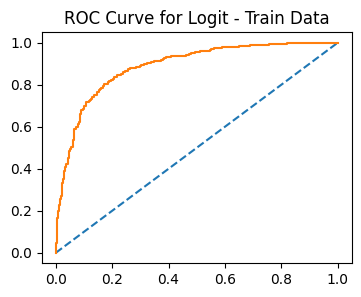

In [816]:
### 1 - LOGIT - TRAIN
plt.figure(figsize=(4,3))
plt.title('ROC Curve for Logit - Train Data')
# predict probabilities
probs11=log_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs11=probs11[:,1]
# calculate AUC
auc11=roc_auc_score(y_train,probs11)
print('AUC: %.3f' % auc11)
# calculate roc curve
train_fpr11,train_tpr11,train_thresholds11=roc_curve(y_train,probs11)
plt.plot([0, 1], [0, 1],linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr11,train_tpr11);

AUC: 0.892


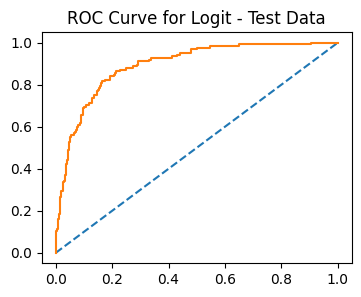

In [817]:
### 1 - LOGIT - TEST
plt.figure(figsize=(4,3))
plt.title('ROC Curve for Logit - Test Data')
# predict probabilities
probs12=log_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs12=probs12[:,1]
# calculate AUC
auc12=roc_auc_score(y_test,probs12)
print('AUC: %.3f' % auc12)
# calculate roc curve
test_fpr12,test_tpr12,test_thresholds12=roc_curve(y_test,probs12)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr12,test_tpr12);

AUC: 0.887


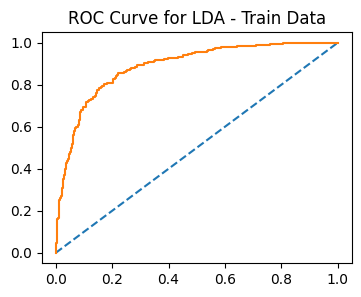

In [818]:
### 2 - LDA - TRAIN

plt.figure(figsize=(4,3))
plt.title('ROC Curve for LDA - Train Data')

probs21=lda_model.predict_proba(X_train)
probs21=probs21[:,1]
auc21=roc_auc_score(y_train,probs21)
print('AUC: %.3f' % auc21)
train_fpr21,train_tpr21,train_thresholds21=roc_curve(y_train,probs21)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr21,train_tpr21);

AUC: 0.890


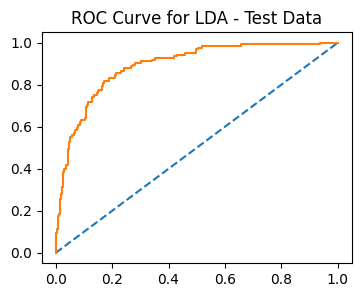

In [819]:
### 2 - LDA - TEST

plt.figure(figsize=(4,3))
plt.title('ROC Curve for LDA - Test Data')

probs22=lda_model.predict_proba(X_test)
probs22=probs22[:,1]
auc22=roc_auc_score(y_test,probs22)
print('AUC: %.3f' % auc22)
test_fpr22,test_tpr22,test_thresholds22=roc_curve(y_test,probs22)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr22,test_tpr22);

AUC: 0.902


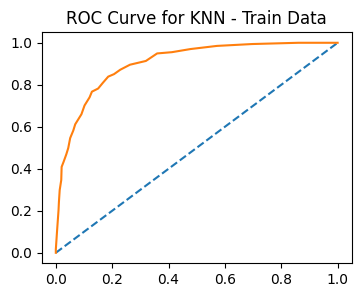

In [820]:
### 2 - KNN - TRAIN

plt.figure(figsize=(4,3))
plt.title('ROC Curve for KNN - Train Data')

probs31=r_knn1.predict_proba(X_train)
probs31=probs31[:,1]
auc31=roc_auc_score(y_train,probs31)
print('AUC: %.3f' % auc31)
train_fpr31,train_tpr31,train_thresholds31=roc_curve(y_train,probs31)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr31,train_tpr31);

AUC: 0.886


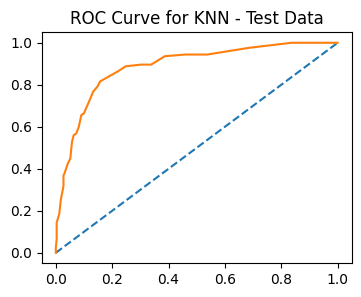

In [821]:
### 2 - KNN - TEST

plt.figure(figsize=(4,3))
plt.title('ROC Curve for KNN - Test Data')

probs32=r_knn1.predict_proba(X_test)
probs32=probs32[:,1]
auc32=roc_auc_score(y_test,probs32)
print('AUC: %.3f' % auc32)
test_fpr32,test_tpr32,test_thresholds32=roc_curve(y_test,probs32)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr32,test_tpr32);

AUC: 0.883


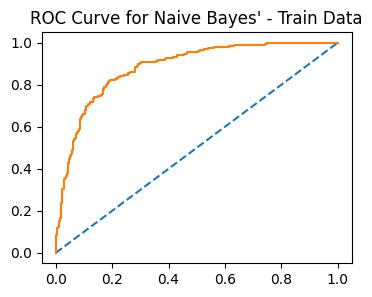

In [822]:
### 2 - Naive Bayes' - TRAIN

plt.figure(figsize=(4,3))
plt.title("ROC Curve for Naive Bayes' - Train Data")

probs41=model_nb.predict_proba(X_train)
probs41=probs41[:,1]
auc41=roc_auc_score(y_train,probs41)
print('AUC: %.3f' % auc41)
train_fpr41,train_tpr41,train_thresholds41=roc_curve(y_train,probs41)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr41,train_tpr41);

AUC: 0.895


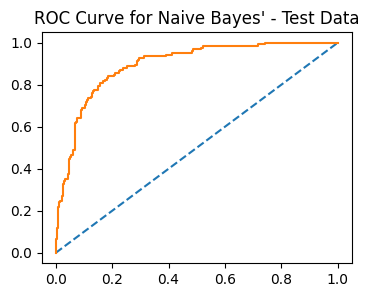

In [823]:
### 2 - Naive Bayes' - TEST

plt.figure(figsize=(4,3))
plt.title("ROC Curve for Naive Bayes' - Test Data")

probs42=model_nb.predict_proba(X_test)
probs42=probs42[:,1]
auc42=roc_auc_score(y_test,probs42)
print('AUC: %.3f' % auc42)
test_fpr42,test_tpr42,test_thresholds42=roc_curve(y_test,probs42)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr42,test_tpr42);

AUC: 1.000


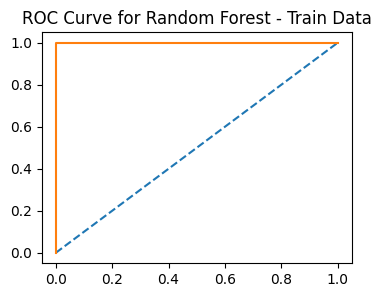

In [824]:
### 2 - Random Forest - TRAIN

plt.figure(figsize=(4,3))
plt.title("ROC Curve for Random Forest - Train Data")

probs51=rfcl.predict_proba(X_train)
probs51=probs51[:,1]
auc51=roc_auc_score(y_train,probs51)
print('AUC: %.3f' % auc51)
train_fpr51,train_tpr51,train_thresholds51=roc_curve(y_train,probs51)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr51,train_tpr51);

AUC: 0.847


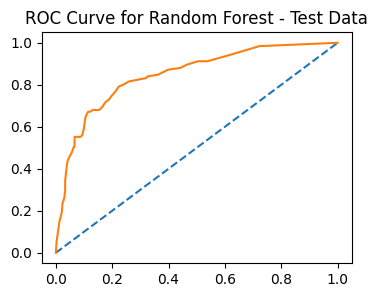

In [825]:
### 2 - Random Forest - TEST

plt.figure(figsize=(4,3))
plt.title("ROC Curve for Random Forest - Test Data")

probs52=rfcl.predict_proba(X_test)
probs52=probs52[:,1]
auc52=roc_auc_score(y_test,probs52)
print('AUC: %.3f' % auc52)
test_fpr52,test_tpr52,test_thresholds52=roc_curve(y_test,probs52)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr52,test_tpr52);

AUC: 0.899


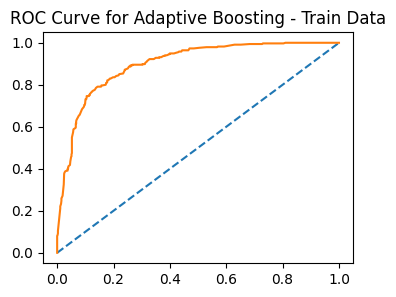

In [826]:
### 2 - AdaBoost - TRAIN

plt.figure(figsize=(4,3))
plt.title("ROC Curve for Adaptive Boosting - Train Data")

probs61=abcl2.predict_proba(X_train)
probs61=probs61[:,1]
auc61=roc_auc_score(y_train,probs61)
print('AUC: %.3f' % auc61)
train_fpr61,train_tpr61,train_thresholds61=roc_curve(y_train,probs61)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr61,train_tpr61);

AUC: 0.886


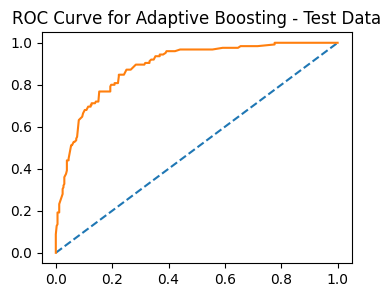

In [827]:
### 2 - AdaBoost - TEST

plt.figure(figsize=(4,3))
plt.title("ROC Curve for Adaptive Boosting - Test Data")

probs62=abcl2.predict_proba(X_test)
probs62=probs62[:,1]
auc62=roc_auc_score(y_test,probs62)
print('AUC: %.3f' % auc62)
test_fpr62,test_tpr62,test_thresholds62=roc_curve(y_test,probs62)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr62,test_tpr62);

AUC: 0.938


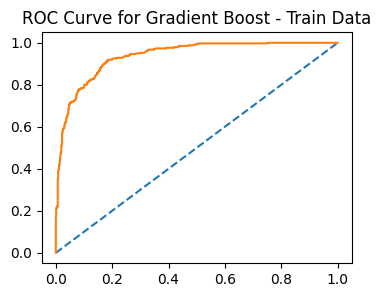

In [828]:
### 2 - Gradient Boosting - TRAIN

plt.figure(figsize=(4,3))
plt.title("ROC Curve for Gradient Boost - Train Data")

probs71=gbcl1.predict_proba(X_train)
probs71=probs71[:,1]
auc71=roc_auc_score(y_train,probs71)
print('AUC: %.3f' % auc71)
train_fpr71,train_tpr71,train_thresholds71=roc_curve(y_train,probs71)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr71,train_tpr71);

AUC: 0.847


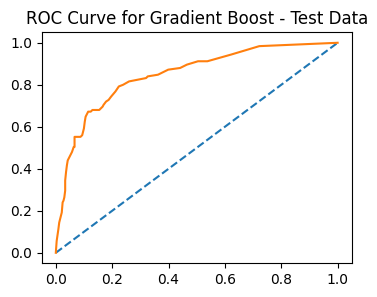

In [829]:
### 2 - Gradient Boosting - TEST

plt.figure(figsize=(4,3))
plt.title("ROC Curve for Gradient Boost - Test Data")

probs72=rfcl.predict_proba(X_test)
probs72=probs72[:,1]
auc72=roc_auc_score(y_test,probs72)
print('AUC: %.3f' % auc72)
test_fpr72,test_tpr72,test_thresholds72=roc_curve(y_test,probs72)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr72,test_tpr72);

In [830]:
model_scores = [
    {'model': 'Logistic Regression', 'accuracy': 0.8311, 'precision': 0.85, 'recall': 0.92, 'f1-score': 0.89 , 'AUC': 0.892,
    'remark':'None'},
    {'model': 'LDA', 'accuracy': 0.8311, 'precision': 0.86, 'recall': 0.91, 'f1-score': 0.89 , 'AUC': 0.890,
    'remark':'None'},
    {'model': 'KNN', 'accuracy': 0.8312, 'precision': 0.86, 'recall': 0.92, 'f1-score' : 0.89, 'AUC': 0.886,
    'remark':'None'},
    {'model': 'Naive Bayes', 'accuracy': 0.8443, 'precision': 0.88, 'recall': 0.90, 'f1-score': 0.89 , 'AUC': 0.895,
    'remark':'None'},
    {'model': 'Random Forest', 'accuracy': 0.8224, 'precision': 0.86, 'recall': 0.90, 'f1-score': 0.88 , 'AUC': 0.847, 
     'remark':'Overfit'},
    {'model': 'AdaBoost', 'accuracy': 0.8377, 'precision': 0.88, 'recall': 0.90, 'f1-score': 0.89, 'AUC': 0.886,
    'remark':'None'},
    {'model': 'Gradient Boost', 'accuracy': 0.8443, 'precision': 0.88, 'recall': 0.92, 'f1-score': 0.90 , 'AUC': 0.847,
    'remark': 'Possible Overfit'},
]

In [831]:
scores_df=pd.DataFrame(model_scores)

In [832]:
scores_df

,model,accuracy,precision,recall,f1-score,AUC,remark
0,Logistic Regression,0.8311,0.85,0.92,0.89,0.892,None
1,LDA,0.8311,0.86,0.91,0.89,0.890,None
2,KNN,0.8312,0.86,0.92,0.89,0.886,None
3,Naive Bayes,0.8443,0.88,0.90,0.89,0.895,None
4,Random Forest,0.8224,0.86,0.90,0.88,0.847,Overfit
5,AdaBoost,0.8377,0.88,0.90,0.89,0.886,None
6,Gradient Boost,0.8443,0.88,0.92,0.90,0.847,Possible Overfit


1. Model Selection Conclusion: I will go ahead with Logistic Regression or Naive Bayes' since the models seem to generalize well on unseen data. They are also giving good AUC scores.

2. It is worth noting that Grid Search CV optimized the KNN model well when we tuned its hyperparameters. At first trial, the model was an overfit but after changing the 'weights', 'leaf_size', and 'n_neighbors', the model performed much better on unseen data.

Inference: 5 marks

1.8 Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific. (5 marks)

Final models: Logit and Naive Bayes

1. According to the business problem, we can take any class as the class of interest since Labour and Conservative parties hold equal value in predicting votes. Due to the problem of class imbalance, the models are performing better for the 0 class (CLabour). Therefore, I have considered the f1-scores for 0 class to evaluate the models.

2. The final models are Logistic Regression (log_model) and Naive Bayes' (model_nb) since they have performed the best in terms of overall metrics, such as 'accuracy', 'f1-score', 'AUC_ROC score'.

3. According to the Logit model, the following is the equation that measures the dependence of Y variable on different features:
###### Y = -2.45857996 + age(1.03420336) + economic_cond_national(-1.22634905) + economic_cond_household(-0.37046377) + Blair(-2.32365965) + Hague(3.18940252) + Europe(1.80540481) + political_knowledge(1.10605656) + gender_male(-0.03399354)


4. The most important features in the above equation are: 

a. Hague, direct impact

b. Blair, inverse impact

c. Europe, direct impact

d. economic_cond_national, inverse impact

In [833]:
proba=model_nb.predict_proba(X.values)
proba_df=pd.DataFrame(data=proba,columns=[f'proba_{i}' for i in range(model_nb.classes_.shape[0])])
proba_df['predicted_class']=proba.argmax(axis=1)
proba_df['true_class']=y

# Merge the predicted probabilities dataframe with the original dataframe
df_proba=pd.concat([y,proba_df], axis=1)

In [834]:
df_proba.iloc[:,1:3]

,proba_0,proba_1
0,1.0,0.000000e+00
1,1.0,1.564534e-253
2,1.0,7.693498e-228
3,1.0,6.239515e-110
4,1.0,0.000000e+00
...,...,...
983,1.0,0.000000e+00
1154,1.0,0.000000e+00
1236,1.0,0.000000e+00
1244,1.0,0.000000e+00


5. In the above example, Naive Bayes' has predicted probabilities of each class for every row.